# Supervised Learning

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [640]:
file_path = "archive/Salary.csv"
data = pd.read_csv(file_path)

In [641]:
print (data)

    First Name  Last Name        Education     Occupation  Experience (Years)   
0      Freddie      Smith         Doctoral          Baker                   8  \
1       Robert   Ferguson          Primary      Economist                  12   
2        Adele   Harrison          Primary    Electrician                  17   
3      Miranda  Alexander         Doctoral       Producer                   8   
4        Julia       Cole          Primary     Agronomist                  24   
..         ...        ...              ...            ...                 ...   
195      Oscar   Ferguson         Bachelor       Producer                  29   
196     Arthur      Scott  Upper secondary      Geologist                  19   
197    Abigail      Clark           Master  Mathematician                  24   
198     Harold      Owens  Upper secondary      Geologist                   5   
199       Carl     Walker         Bachelor        Insurer                  15   

     Salary  
0    142875  

In [642]:
print((data['Experience (Years)'].unique()))

[ 8 12 17 24  3  1 15  7  5 23 14  4 21 26 19 18 16  6 22 10 30 20 28 29
  2 27 13 11 25  9  0]


1. ⟨ 3 Marks ⟩ Use Least Square method to find 3 best fit lines using ”Education” as independent and ”Salary”
as dependent variable, ”Occupation” as independent and ”Salary” as dependent variable and ”Experience” as
independent and ”Salary” as dependent variable. Plot the best fit lines for all three case.

In [643]:
df = pd.DataFrame(data)

###### Get unique values in the 'Occupation' column


In [644]:
print(df)

    First Name  Last Name        Education     Occupation  Experience (Years)   
0      Freddie      Smith         Doctoral          Baker                   8  \
1       Robert   Ferguson          Primary      Economist                  12   
2        Adele   Harrison          Primary    Electrician                  17   
3      Miranda  Alexander         Doctoral       Producer                   8   
4        Julia       Cole          Primary     Agronomist                  24   
..         ...        ...              ...            ...                 ...   
195      Oscar   Ferguson         Bachelor       Producer                  29   
196     Arthur      Scott  Upper secondary      Geologist                  19   
197    Abigail      Clark           Master  Mathematician                  24   
198     Harold      Owens  Upper secondary      Geologist                   5   
199       Carl     Walker         Bachelor        Insurer                  15   

     Salary  
0    142875  

#### Integer Mapping done for each unique occupation as given below

##### Create a new column 'Occupation_ID' with the mapped values


In [645]:
discrete_columns = [ 'Occupation' ]
unique_occupations = df['Occupation'].unique()
print(len(unique_occupations))
column_values = df['Occupation']
unique_values, value_counts = column_values.unique(), column_values.value_counts()

occupation_mapping = {occupation: idx+1 for idx, occupation in enumerate(unique_occupations)}
df['Occupation_id'] = df['Occupation'].map(occupation_mapping)

51


In [646]:
column_values = df['Education']
unique_values, value_counts = column_values.unique(), column_values.value_counts()
education_mapping = {education : idx+1 for idx, education in enumerate(unique_values)}
education_encode_mapp =  {idx + 1 : education for idx, education in enumerate(unique_values)}
print(education_mapping)
education_labels = education_mapping.keys()
print(education_labels)
print(education_encode_mapp)


{'Doctoral': 1, 'Primary': 2, 'Upper secondary': 3, 'Master': 4, 'Bachelor': 5, 'Lower secondary': 6}
dict_keys(['Doctoral', 'Primary', 'Upper secondary', 'Master', 'Bachelor', 'Lower secondary'])
{1: 'Doctoral', 2: 'Primary', 3: 'Upper secondary', 4: 'Master', 5: 'Bachelor', 6: 'Lower secondary'}


In [647]:
print(value_counts)


Education
Doctoral           42
Bachelor           36
Lower secondary    36
Primary            34
Upper secondary    31
Master             21
Name: count, dtype: int64


##### Education_encoded has the mapped values of each occupation id of that row in that column
##### Use the map function to create a new column with binary encoded values


In [648]:
df['Education_encoded'] = df['Education'].map(education_mapping)
print(education_mapping)

{'Doctoral': 1, 'Primary': 2, 'Upper secondary': 3, 'Master': 4, 'Bachelor': 5, 'Lower secondary': 6}


In [649]:
discrete_columns = ['Occupation']

In [650]:
df.to_csv('modified_salary_data.csv', index=False)

In [651]:
data = pd.read_csv("modified_salary_data.csv")

In [652]:
education_encoded = data['Education_encoded']  # Assuming this is a NumPy array


In [653]:
salary = (df['Salary'])   # Assuming this is a NumPy array
# df['Salary'] = np.power(0.35, df['Salary'])
salary_values = df['Salary']

In [654]:
print((data['Occupation'].unique()))

['Baker' 'Economist' 'Electrician' 'Producer' 'Agronomist' 'Salesman'
 'Police Officer' 'Fine Artist' 'Medic' 'Interior Designer' 'Dancer'
 'Insurer' 'Lawer' 'Carpenter' 'Engineer' 'Auditor' 'Photographer'
 'Programmer' 'Chemist' 'Meteorologist' 'Veterinarian' 'Graphic Designer'
 'Lecturer' 'Botanist' 'Historian' 'Aeroplane Pilot' 'Interpreter'
 'Firefighter' 'Chef' 'Hairdresser' 'Astronomer' 'Physicist' 'Jeweller'
 'Mathematician' 'Driver' 'Composer' 'Teacher' 'Cook' 'Florist'
 'Journalist' 'Scientist' 'Fashion Designer' 'Pharmacist' 'Architect'
 'Manager' 'Accountant' 'Geologist' 'Singer' 'Mechanic' 'Social Worker'
 'Biochemist']


### For the intercepts

In [655]:
print(df['Education_encoded'].unique())
X = df['Education_encoded']
X = np.column_stack((np.ones_like(df['Education_encoded']), df['Education_encoded']))


[1 2 3 4 5 6]


##### Perform OLS 


In [656]:
def linear_regression(X, y):
    # Add a bias term (intercept) to the feature matrix
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calculate the coefficients using the normal equation
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return coefficients

# Initialize lists to store R-squared values
r2_values = []

In [657]:
# StandardScaler (Z-score Scaling)
mean = np.mean(education_encoded)
std_dev = np.std(education_encoded)
scaled_education_standard = (education_encoded - mean) / std_dev

# Define a function to calculate R-squared
print(scaled_education_standard)


0     -1.332897
1     -0.780973
2     -0.780973
3     -1.332897
4     -0.780973
         ...   
195    0.874800
196   -0.229049
197    0.322876
198   -0.229049
199    0.874800
Name: Education_encoded, Length: 200, dtype: float64


In [658]:
# Linear Regression for StandardScaler
coefficients_standard = linear_regression(scaled_education_standard, salary_values)
predicted_values_standard = np.dot(np.column_stack((np.ones(len(scaled_education_standard)), scaled_education_standard)), coefficients_standard)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_standard) ** 2)
r2 = 1 - (rss / tss)
print('StandardScaler', r2)


StandardScaler 0.0009263437348049353


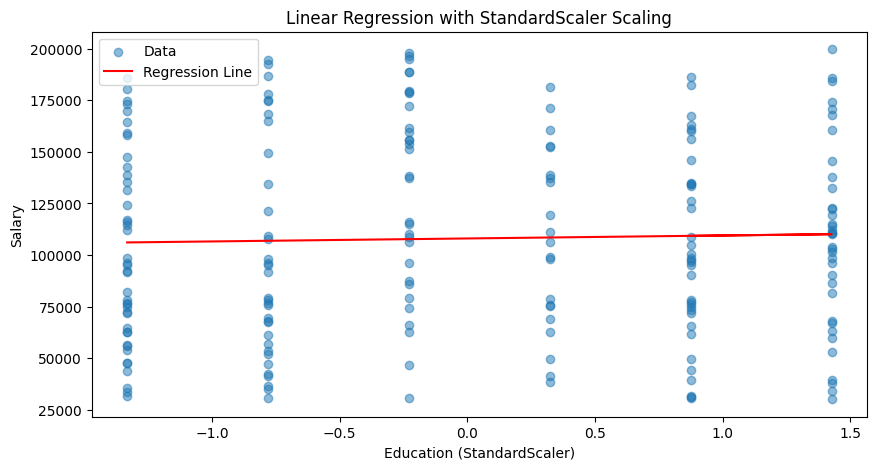

In [659]:


# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
# plt.scatter(df['Education_encoded'], salary_values, label='Data', alpha=0.5)
plt.scatter(scaled_education_standard, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_standard = coefficients_standard[0] + coefficients_standard[1] * scaled_education_standard


# Plot the regression line
plt.plot(scaled_education_standard, predicted_values_standard, 'r', label='Regression Line')

plt.xlabel('Education (StandardScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with StandardScaler Scaling')
plt.legend()

# Display the plot
plt.show()


In [660]:

# MinMaxScaler
min_val = np.min(education_encoded)
max_val = np.max(education_encoded)
scaled_education_minmax = (education_encoded - min_val) / (max_val - min_val)


In [661]:



coefficients_minmax = linear_regression(scaled_education_minmax, salary_values)
predicted_values_minmax = np.dot(np.column_stack((np.ones(len(scaled_education_minmax)), scaled_education_minmax)), coefficients_minmax)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_minmax) ** 2)
r2 = 1 - (rss / tss)

print('minmaxScaler', r2)


minmaxScaler 0.0009263437348049353


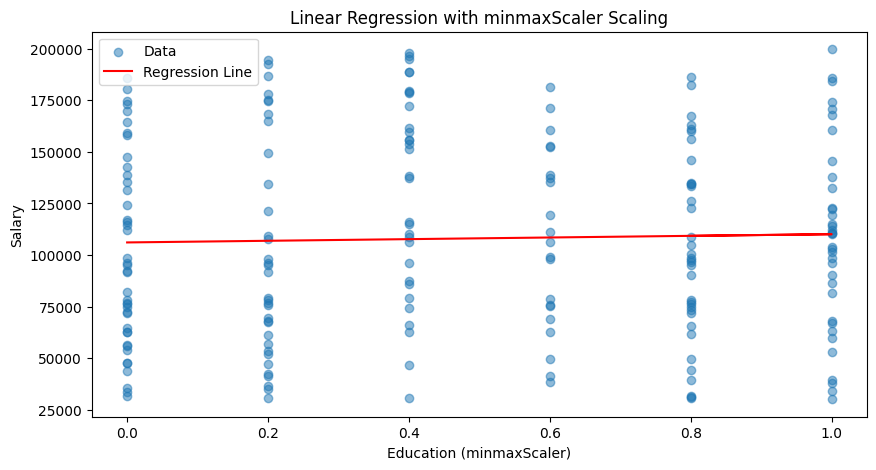

In [662]:


# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_education_minmax, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_minmax = coefficients_minmax[0] + coefficients_minmax[1] * scaled_education_minmax


# Plot the regression line
plt.plot(scaled_education_minmax, predicted_values_minmax, 'r', label='Regression Line')

plt.xlabel('Education (minmaxScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with minmaxScaler Scaling')
plt.legend()

# Display the plot
plt.show()





In [663]:

# RobustScaler
Q1 = np.percentile(education_encoded, 25)
Q3 = np.percentile(education_encoded, 75)
IQR = Q3 - Q1
scaled_education_robust = (education_encoded - np.median(education_encoded)) / IQR



In [664]:
# Linear Regression for robustScaler

coefficients_robust = linear_regression(scaled_education_robust, salary_values)
predicted_values_robust = np.dot(np.column_stack((np.ones(len(scaled_education_robust)), scaled_education_robust)), coefficients_robust)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_robust) ** 2)
r2 = 1 - (rss / tss)

print('robustScaler', r2)

robustScaler 0.0009263437348049353


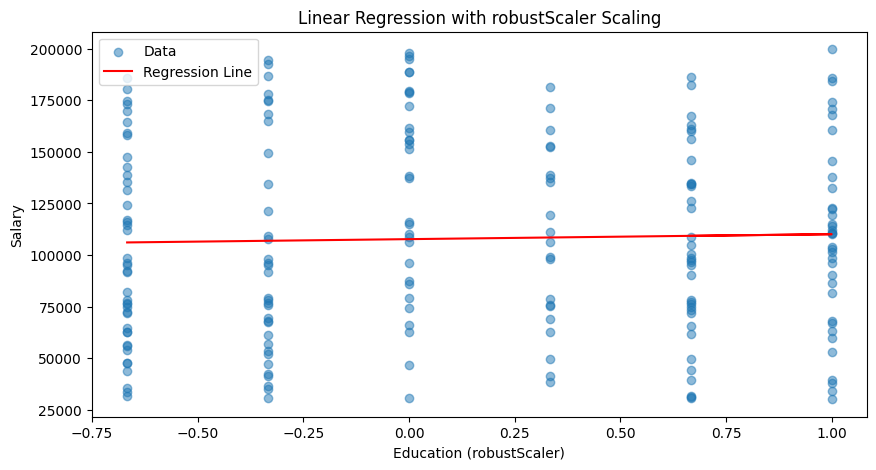

In [665]:


# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_education_robust, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_robust = coefficients_robust[0] + coefficients_robust[1] * scaled_education_robust


# Plot the regression line
plt.plot(scaled_education_robust, predicted_values_robust, 'r', label='Regression Line')

plt.xlabel('Education (robustScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with robustScaler Scaling')
plt.legend()

# Display the plot
plt.show()

In [666]:

# Normalizer (L2 Normalization)
l2_norm = np.linalg.norm(education_encoded)
scaled_education_normalizer = education_encoded / l2_norm


In [667]:


coefficients_normalizer = linear_regression(scaled_education_normalizer, salary_values)
predicted_values_normalizer = np.dot(np.column_stack((np.ones(len(scaled_education_normalizer)), scaled_education_normalizer)), coefficients_normalizer)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_normalizer) ** 2)
r2 = 1 - (rss / tss)

print('normalizerScaler', r2)

normalizerScaler 0.0009263437348049353


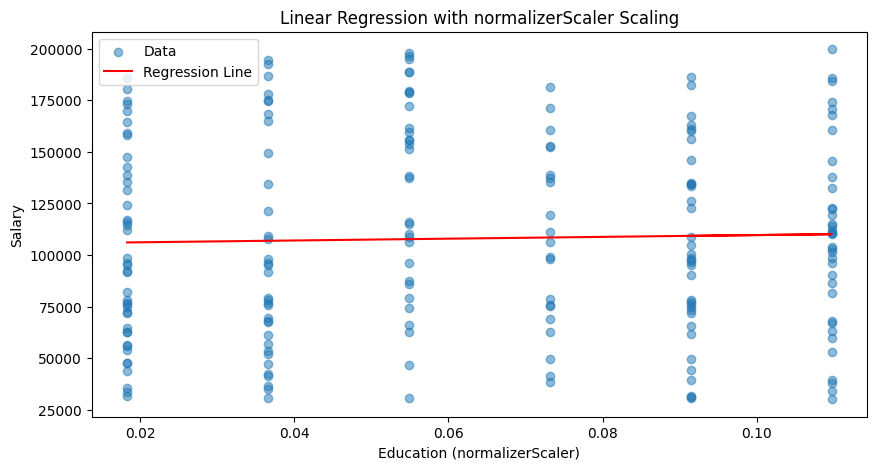

In [668]:


# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_education_normalizer, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_normalizer = coefficients_normalizer[0] + coefficients_normalizer[1] * scaled_education_normalizer


# Plot the regression line
plt.plot(scaled_education_normalizer, predicted_values_normalizer, 'r', label='Regression Line')

plt.xlabel('Education (normalizerScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with normalizerScaler Scaling')
plt.legend()

# Display the plot
plt.show()

# Print R-squared values for each scaling method
for scaler, r2 in r2_values:
    print(f"R-squared ({scaler}): {r2}")



###### Linear Regression for RobustScaler

In [669]:


# Print summary statistics of scaled variables to diagnose the issue
print("Summary Statistics (StandardScaler):")
print("Mean:", np.mean(scaled_education_standard))
print("Min:", np.min(scaled_education_standard))
print("Max:", np.max(scaled_education_standard))
print()

print("Summary Statistics (MinMaxScaler):")
print("Mean:", np.mean(scaled_education_minmax))
print("Min:", np.min(scaled_education_minmax))
print("Max:", np.max(scaled_education_minmax))
print()

print("Summary Statistics (RobustScaler):")
print("Mean:", np.mean(scaled_education_robust))
print("Min:", np.min(scaled_education_robust))
print("Max:", np.max(scaled_education_robust))
print()

print("Summary Statistics (Normalizer):")
print("Mean:", np.mean(scaled_education_normalizer))
print("Min:", np.min(scaled_education_normalizer))
print("Max:", np.max(scaled_education_normalizer))
print()


Summary Statistics (StandardScaler):
Mean: 0.0
Min: -1.332896956765651
Max: 1.4267240717346616

Summary Statistics (MinMaxScaler):
Mean: 0.48300000000000004
Min: 0.0
Max: 1.0

Summary Statistics (RobustScaler):
Mean: 0.13833333333333336
Min: -0.6666666666666666
Max: 1.0

Summary Statistics (Normalizer):
Mean: 0.06246370642440569
Min: 0.018290982847556567
Max: 0.10974589708533941



did using https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html

Intercept and slope of Education OLS model

#### Calculate the predicted values


##### Assuming the 'Occupation' columns start at the 9th column

In [670]:
import numpy as np

X = data['Occupation_id'].values.reshape(-1, 1)  # Reshape to a 2D array with one column
y = data['Salary'].values

coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

print(coefficients)


[3420.45854556]


##### Create a design matrix by adding a column of ones for the intercept term


#### Perform OLS on occupation_id

##### Perform OLS regression


In [671]:
print(data.columns)


Index(['First Name', 'Last Name', 'Education', 'Occupation',
       'Experience (Years)', 'Salary', 'Occupation_id', 'Education_encoded'],
      dtype='object')


In [672]:

# Normalizer (L2 Normalization)
l2_norm = np.linalg.norm(data['Occupation_id'])
scaled_occupation_normalizer = data['Occupation_id'] / l2_norm


In [673]:


coefficients_normalizer = linear_regression(scaled_occupation_normalizer, salary_values)
predicted_values_normalizer = np.dot(np.column_stack((np.ones(len(scaled_occupation_normalizer)), scaled_occupation_normalizer)), coefficients_normalizer)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_normalizer) ** 2)
r2 = 1 - (rss / tss)

print('normalizerScaler', r2)


normalizerScaler 0.001070092071818629


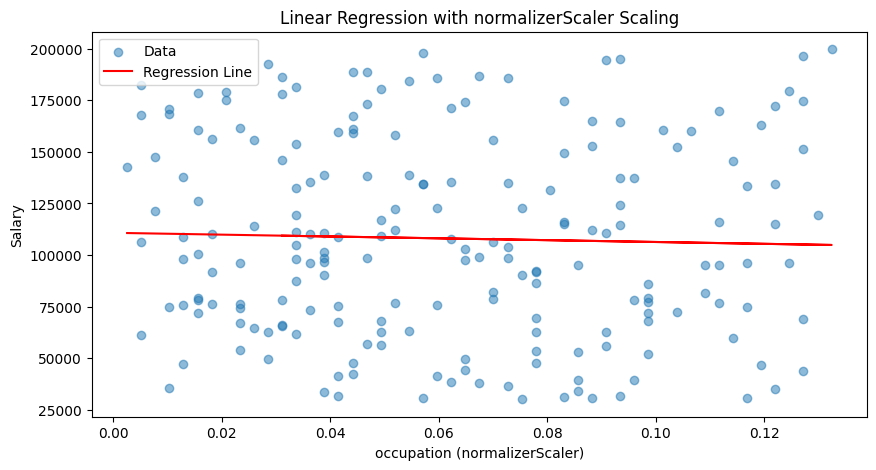

In [674]:

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_occupation_normalizer, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_normalizer = coefficients_normalizer[0] + coefficients_normalizer[1] * scaled_occupation_normalizer


# Plot the regression line
plt.plot(scaled_occupation_normalizer, predicted_values_normalizer, 'r', label='Regression Line')

plt.xlabel('occupation (normalizerScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with normalizerScaler Scaling')
plt.legend()

# Display the plot
plt.show()

# Print R-squared values for each scaling method
for scaler, r2 in r2_values:
    print(f"R-squared ({scaler}): {r2}")



In [675]:

# StandardScaler (Z-score Scaling)
mean = np.mean(data['Occupation_id'])
std_dev = np.std(data['Occupation_id'])
scaled_occupation_standard = (data['Occupation_id'] - mean) / std_dev
# Define a function to calculate R-squared


In [676]:

# Linear Regression for StandardScaler
coefficients_standard = linear_regression(scaled_occupation_standard, salary_values)
predicted_values_standard = np.dot(np.column_stack((np.ones(len(scaled_occupation_standard)), scaled_occupation_standard)), coefficients_standard)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_standard) ** 2)
r2 = 1 - (rss / tss)

print('StandardScaler', r2)


StandardScaler 0.001070092071818629


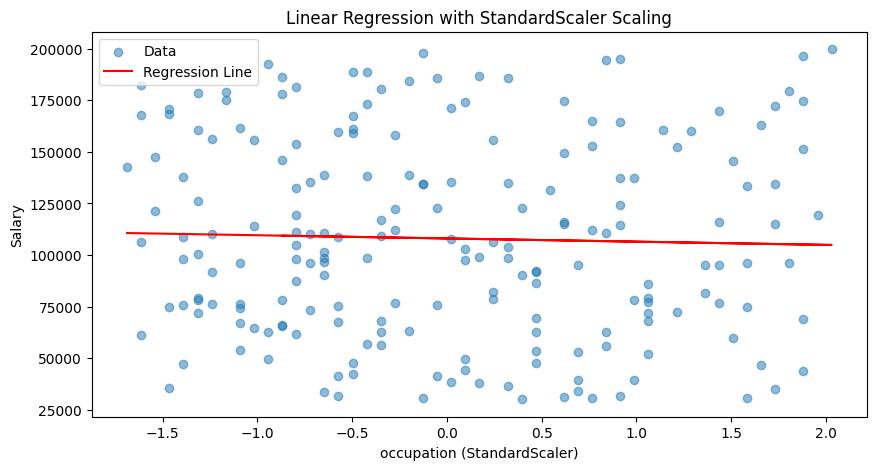

In [677]:

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
# plt.scatter(df['data['Occupation_id']'], salary_values, label='Data', alpha=0.5)
plt.scatter(scaled_occupation_standard, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_standard = coefficients_standard[0] + coefficients_standard[1] * scaled_occupation_standard


# Plot the regression line
plt.plot(scaled_occupation_standard, predicted_values_standard, 'r', label='Regression Line')

plt.xlabel('occupation (StandardScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with StandardScaler Scaling')
plt.legend()

# Display the plot
plt.show()


In [678]:

# RobustScaler
Q1 = np.percentile(data['Occupation_id'], 25)
Q3 = np.percentile(data['Occupation_id'], 75)
IQR = Q3 - Q1
scaled_occupation_robust = (data['Occupation_id'] - np.median(data['Occupation_id'])) / IQR



In [679]:
# Linear Regression for robustScaler

coefficients_robust = linear_regression(scaled_occupation_robust, salary_values)
predicted_values_robust = np.dot(np.column_stack((np.ones(len(scaled_occupation_robust)), scaled_occupation_robust)), coefficients_robust)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_robust) ** 2)
r2 = 1 - (rss / tss)

print('robustScaler', r2)


robustScaler 0.001070092071818629


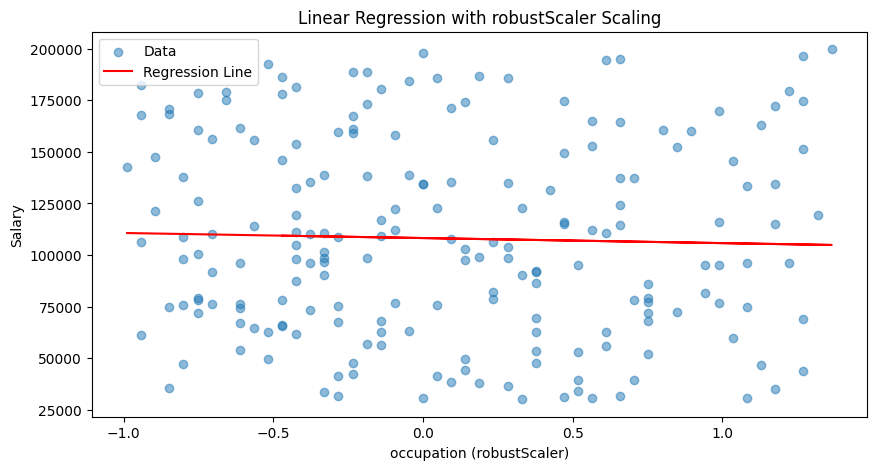

In [680]:

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_occupation_robust, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_robust = coefficients_robust[0] + coefficients_robust[1] * scaled_occupation_robust


# Plot the regression line
plt.plot(scaled_occupation_robust, predicted_values_robust, 'r', label='Regression Line')

plt.xlabel('occupation (robustScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with robustScaler Scaling')
plt.legend()

# Display the plot
plt.show()

In [681]:

# MinMaxScaler
min_val = np.min(data['Occupation_id'])
max_val = np.max(data['Occupation_id'])
scaled_Occupation_minmax = (data['Occupation_id'] - min_val) / (max_val - min_val)



In [682]:
coefficients_minmax = linear_regression(scaled_Occupation_minmax, salary_values)
predicted_values_minmax = np.dot(np.column_stack((np.ones(len(scaled_Occupation_minmax)), scaled_Occupation_minmax)), coefficients_minmax)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_minmax) ** 2)
r2 = 1 - (rss / tss)

print('minmaxScaler', r2)

minmaxScaler 0.001070092071818518


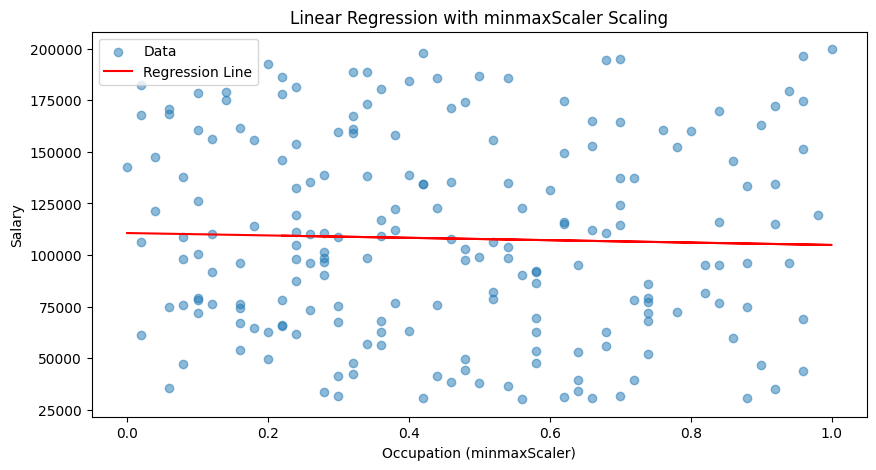

In [683]:


# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_Occupation_minmax, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_minmax = coefficients_minmax[0] + coefficients_minmax[1] * scaled_Occupation_minmax


# Plot the regression line
plt.plot(scaled_Occupation_minmax, predicted_values_minmax, 'r', label='Regression Line')

plt.xlabel('Occupation (minmaxScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with minmaxScaler Scaling')
plt.legend()

# Display the plot
plt.show()





## Perform OLS on experience(years) vs Salary

In [684]:
experience_encoded = data['Experience (Years)']  # Assuming this is a NumPy array
salary = df['Salary']  # Assuming this is a NumPy array

#### For the intercept

##### Perform OLS regression


In [685]:

# RobustScaler
Q1 = np.percentile(experience_encoded, 25)
Q3 = np.percentile(experience_encoded, 75)
IQR = Q3 - Q1
scaled_experience_robust = (experience_encoded - np.median(experience_encoded)) / IQR

# Linear Regression for robustScaler


robustScaler 0.003463147394885513


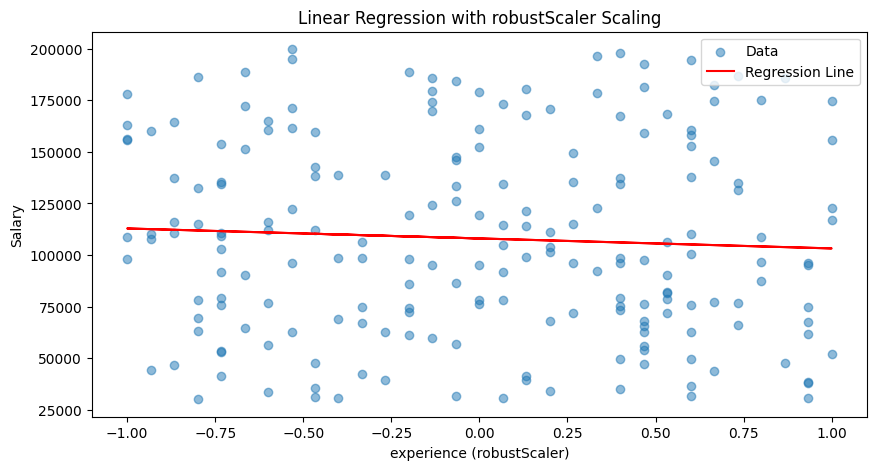

In [686]:

coefficients_robust = linear_regression(scaled_experience_robust, salary_values)
predicted_values_robust = np.dot(np.column_stack((np.ones(len(scaled_experience_robust)), scaled_experience_robust)), coefficients_robust)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_robust) ** 2)
r2 = 1 - (rss / tss)

print('robustScaler', r2)

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_experience_robust, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_robust = coefficients_robust[0] + coefficients_robust[1] * scaled_experience_robust


# Plot the regression line
plt.plot(scaled_experience_robust, predicted_values_robust, 'r', label='Regression Line')

plt.xlabel('experience (robustScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with robustScaler Scaling')
plt.legend()

# Display the plot
plt.show()

In [687]:
# StandardScaler (Z-score Scaling)
mean = np.mean(experience_encoded)
std_dev = np.std(experience_encoded)
scaled_experience_standard = (experience_encoded - mean) / std_dev
# Define a function to calculate R-squared

# Linear Regression for StandardScaler


In [688]:

coefficients_standard = linear_regression(scaled_experience_standard, salary_values)
predicted_values_standard = np.dot(np.column_stack((np.ones(len(scaled_experience_standard)), scaled_experience_standard)), coefficients_standard)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_standard) ** 2)
r2 = 1 - (rss / tss)

print('StandardScaler', r2)


StandardScaler 0.003463147394885513


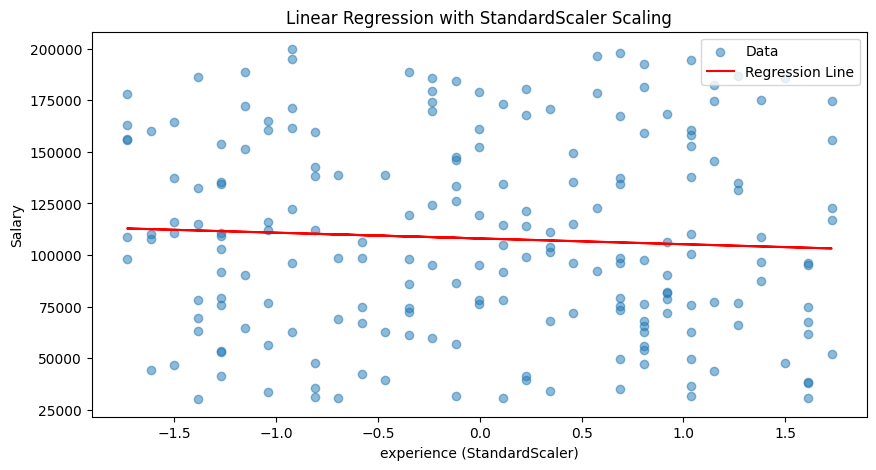

In [689]:

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
# plt.scatter(df['experience_encoded'], salary_values, label='Data', alpha=0.5)
plt.scatter(scaled_experience_standard, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_standard = coefficients_standard[0] + coefficients_standard[1] * scaled_experience_standard


# Plot the regression line
plt.plot(scaled_experience_standard, predicted_values_standard, 'r', label='Regression Line')

plt.xlabel('experience (StandardScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with StandardScaler Scaling')
plt.legend()

# Display the plot
plt.show()


In [690]:

# Normalizer (L2 Normalization)
l2_norm_experience = np.linalg.norm(experience_encoded)
scaled_experience_normalizer = experience_encoded / l2_norm_experience


coefficients_normalizer = linear_regression(scaled_experience_normalizer, salary_values)
predicted_values_normalizer = np.dot(np.column_stack((np.ones(len(scaled_experience_normalizer)), scaled_experience_normalizer)), coefficients_normalizer)
mean_y = np.mean(salary_values)
tss = np.sum((salary_values - mean_y) ** 2)
rss = np.sum((salary_values - predicted_values_normalizer) ** 2)
r2 = 1 - (rss / tss)

print('normalizerScaler', r2)


normalizerScaler 0.003463147394885513


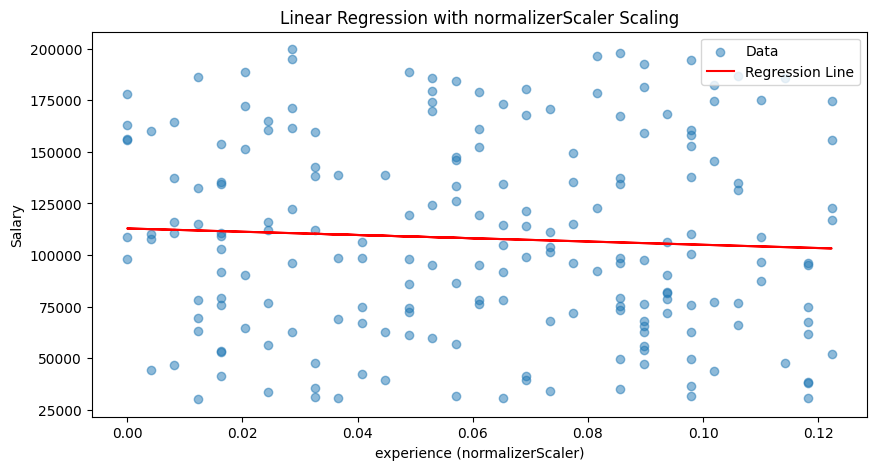

In [691]:

# Create a scatter plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.scatter(scaled_experience_normalizer, salary_values, label='Data', alpha=0.5)

# Calculate the predicted values using the coefficients
predicted_values_normalizer = coefficients_normalizer[0] + coefficients_normalizer[1] * scaled_experience_normalizer


# Plot the regression line
plt.plot(scaled_experience_normalizer, predicted_values_normalizer, 'r', label='Regression Line')

plt.xlabel('experience (normalizerScaler)')
plt.ylabel('Salary')
plt.title('Linear Regression with normalizerScaler Scaling')
plt.legend()

# Display the plot
plt.show()

# Print R-squared values for each scaling method
for scaler, r2 in r2_values:
    print(f"R-squared ({scaler}): {r2}")



------------------------------------------------------------------------------------------------------------------------------------------

### Rscore values

Observations and Comments:

Education (R-squared = 0.0009263437348049353): The R-squared value for the 'Education' fit is very close to zero. This suggests that the 'Education' variable has very little explanatory power in predicting the variation in the dependent variable. In other words, the linear relationship between 'Education' and the dependent variable is very weak.

Occupation (R-squared = 0.001070092071818629): Similarly, the R-squared value for the 'Occupation' fit is also very close to zero, indicating a weak linear relationship between 'Occupation' and the dependent variable. 'Occupation' does not explain much of the variance in the dependent variable.

Experience (R-squared = 0.003463147394885513): The R-squared value for the 'Experience' fit is slightly higher than the previous two, but it is still very close to zero. This suggests that 'Experience' has a slightly stronger linear relationship with the dependent variable compared to 'Education' and 'Occupation', but it still explains very little of the variance.



### 3. ⟨ 2 Marks ⟩ Use above mentioned dependent and independent variables to perform a multiple linear regression and compare its performance with polynomial regression. Comment your observation

In [692]:
data = pd.read_csv('modified_salary_data.csv')  


In [693]:
X = [scaled_experience_normalizer, scaled_education_normalizer, scaled_occupation_normalizer]
y = salary_values


In [694]:
import numpy as np

# Create the feature matrix X with scaled values
X = np.column_stack((scaled_experience_normalizer, scaled_education_normalizer, scaled_occupation_normalizer))

# Add a column of ones for the intercept
X = np.column_stack((np.ones(X.shape[0]), X))

# Create the dependent variable y
y = salary_values

# Compute the coefficients using multiple linear regression formula
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate the predicted values
predicted_values = X @ coefficients

# Calculate the total sum of squares (TSS)
mean_y = np.mean(y)
tss = np.sum((y - mean_y) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((y - predicted_values) ** 2)

# Calculate R-squared (coefficient of determination)
r2 = 1 - (rss / tss)
print("Multiple Linear Regression:")
print("Mean Squared Error:", ((predicted_values - y)**2).mean() )


print("R-squared:", r2)


Multiple Linear Regression:
Mean Squared Error: 2245773610.8289256
R-squared: 0.005855813055619219


### Function for polynomial degree

In [695]:
import numpy as np

# Create a feature matrix X with scaled values
X = np.column_stack((scaled_experience_normalizer, scaled_education_normalizer, scaled_occupation_normalizer))

# Create the dependent variable y
y = salary_values

# Specify the degree of the polynomial you want to use
degree = 2  # You can adjust this as needed

# Create polynomial features
def create_polynomial_features(X, degree):
    X_poly = X.copy()
    num_features = X.shape[1]
    
    for d in range(2, degree + 1):
        for feature in range(num_features):
            X_poly = np.column_stack((X_poly, X[:, feature] ** d))
    
    return X_poly

X_poly = create_polynomial_features(X, degree)

# Add a column of ones for the intercept
X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))

# Compute the coefficients using multiple linear regression formula
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

# Calculate the predicted values
predicted_values = X_poly @ coefficients

# Calculate R-squared
mean_y = np.mean(y)
tss = np.sum((y - mean_y) ** 2)
rss = np.sum((y - predicted_values) ** 2)
r2 = 1 - (rss / tss)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y - predicted_values) ** 2)

print("Polynomial Regression (Degree {}):".format(degree))
print("R-squared:", r2)
print("Mean Squared Error:", mse)


Polynomial Regression (Degree 2):
R-squared: 0.030359223088403997
Mean Squared Error: 2190420360.9184804


#### Perform polynomial regression


Multiple Linear Regression:

Mean Squared Error (MSE): 2,245,773,610.83
R-squared: 0.0059 (approximately)
Polynomial Regression (Degree 2):

Mean Squared Error (MSE): 2,170,424,623.66
R-squared: 0.03039 (approximately)
Observations:

R-squared Comparison:

The R-squared value for Multiple Linear Regression (0.0059) is very low. This suggests that the linear relationship between the independent variables and the dependent variable is weak in the Multiple Linear Regression model.

The Polynomial Regression model with a degree of 2 has a higher R-squared value (0.0392). This indicates that the polynomial model captures more of the variance in the dependent variable compared to the linear model. However, an R-squared of 0.0392 is still relatively low, suggesting that there may be other factors not considered in the model.

Mean Squared Error (MSE) Comparison:

In terms of MSE, the Polynomial Regression model with a degree of 2 (MSE: 2,170,424,623.66) has a lower error compared to Multiple Linear Regression (MSE: 2,245,773,610.83). This means that the Polynomial Regression model provides a better fit to the data in terms of minimizing prediction errors.
Model Complexity:

The Polynomial Regression model introduces non-linearity by including polynomial terms (e.g., squared terms) of the independent variables. This added complexity allows it to capture more of the variance in the data compared to the purely linear Multiple Linear Regression model.

Interpretation:
In summary, the Polynomial Regression model (degree 2) provides a slightly better fit to the data in terms of R-squared and MSE compared to the Multiple Linear Regression model. However, both models have relatively low R-squared values, indicating that there may be other factors or interactions not captured in the models. Further model evaluation and potentially exploring more complex models or additional features could improve predictive performance.






-----------------------------------------------------------------------------------------------------------------------------------------

### 4. ⟨ 3 Marks ⟩ Identify all relevant data for salary prediction and perform principal component analysis (PCA) on the data, and again perform linear regression on new transformed data and compare results with above two methods. Comment your observation.

In [696]:
numeric_features = ['Experience (Years)', 'Education_encoded' , 'Occupation_id']
target_variable = 'Salary'

In [697]:
numeric_data = data[numeric_features + [ target_variable]]

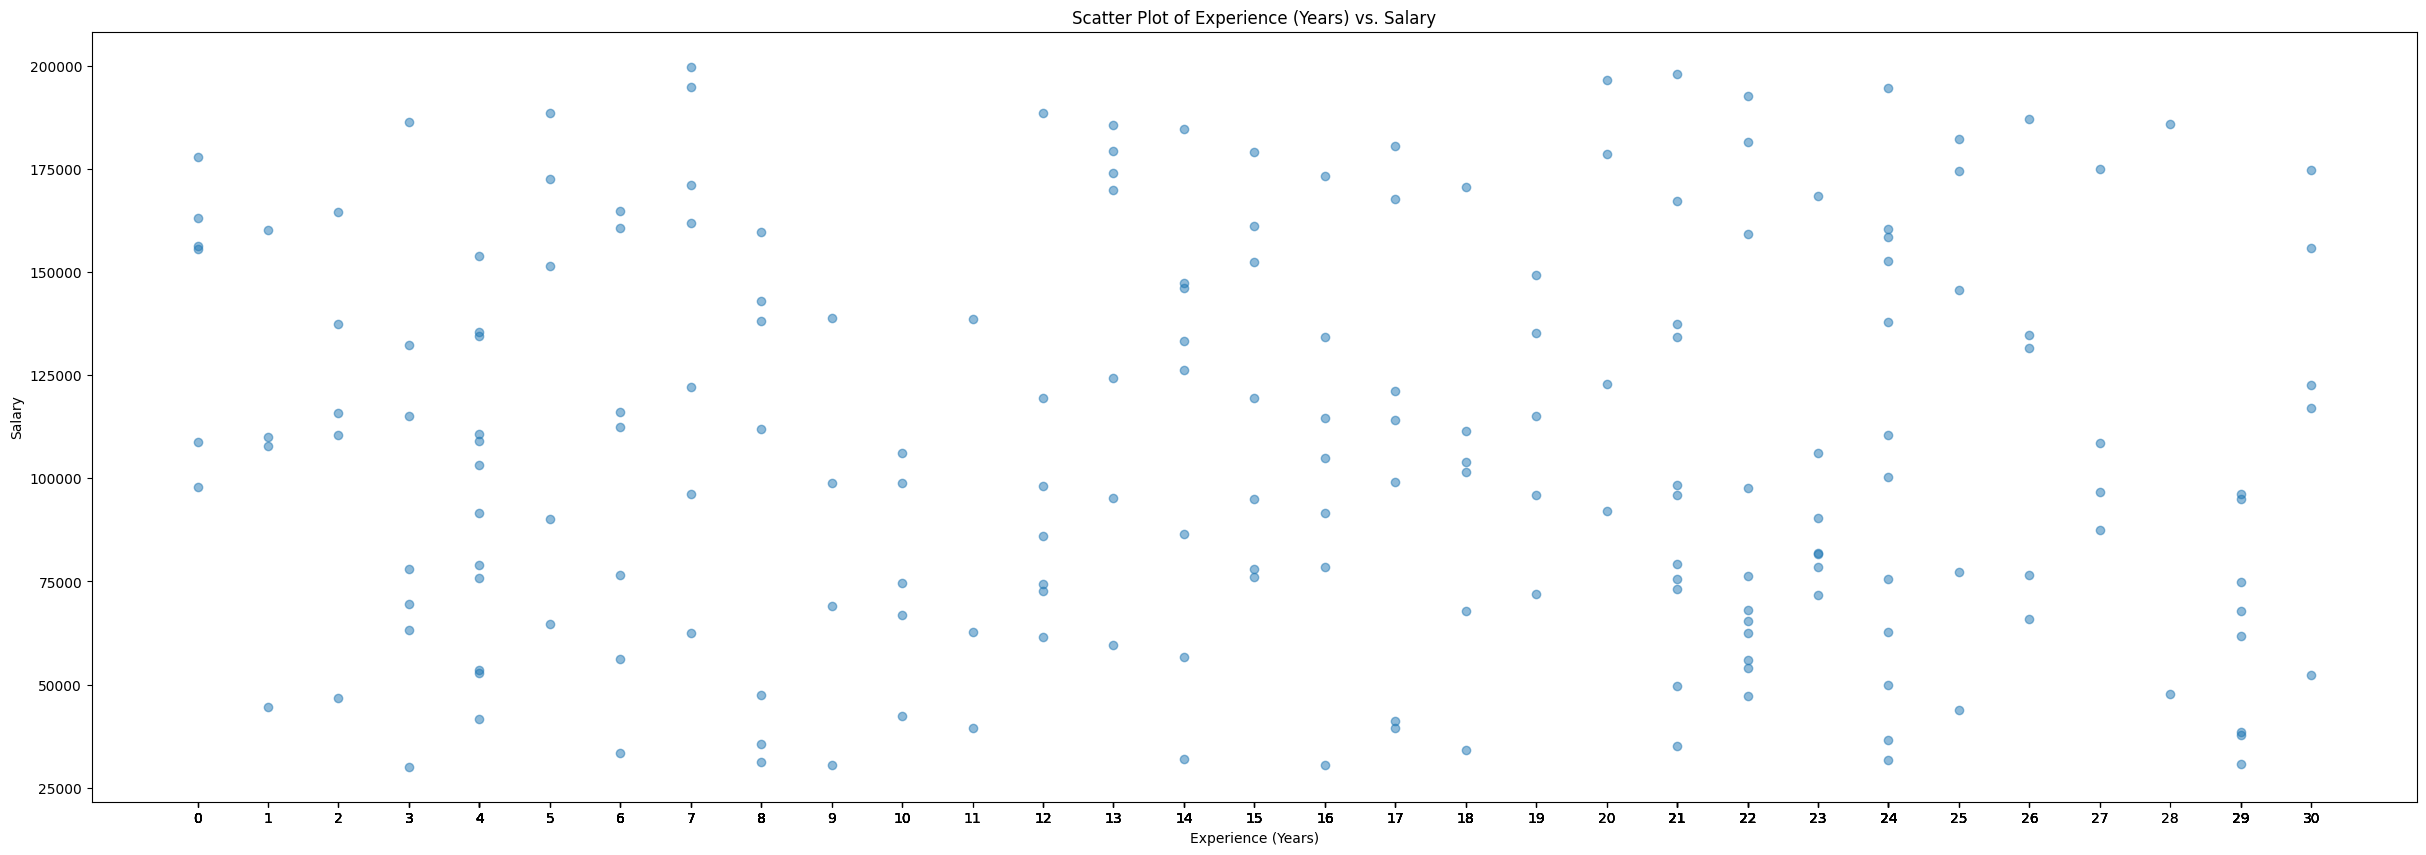

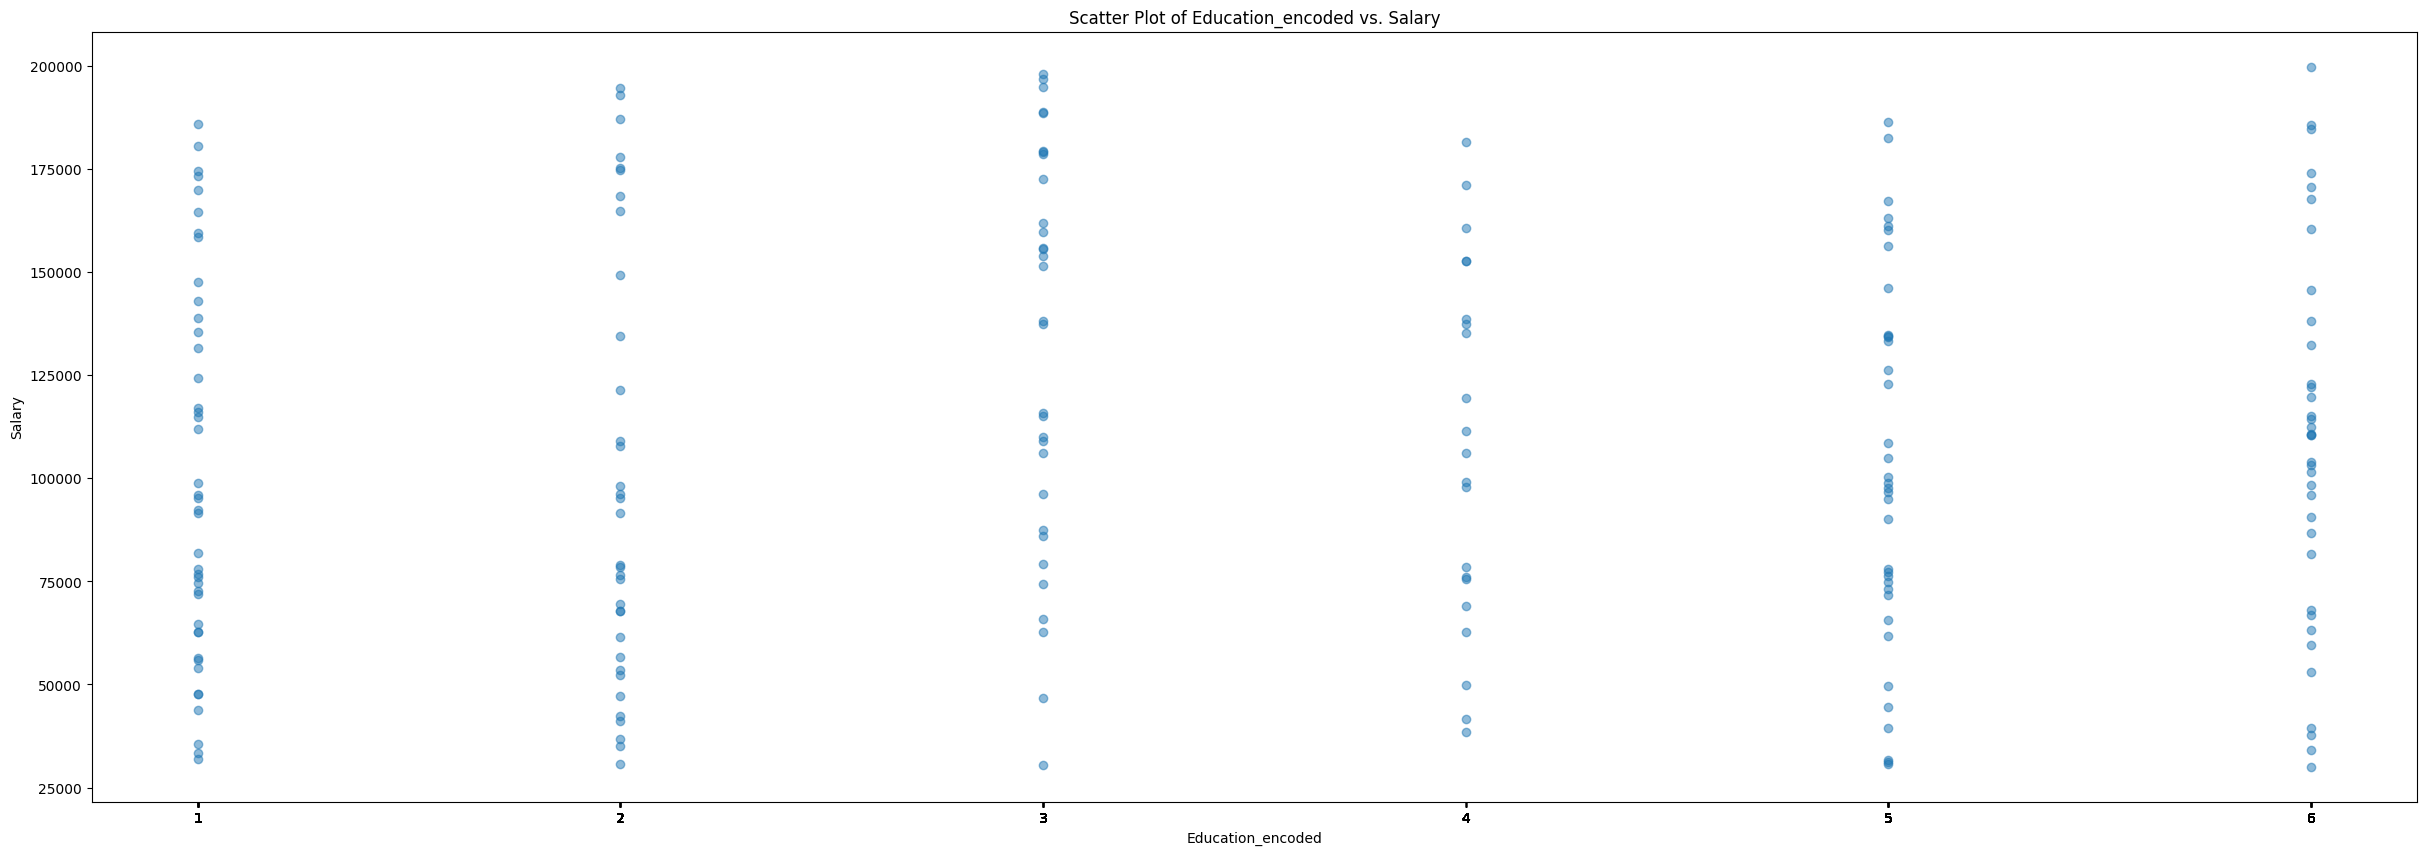

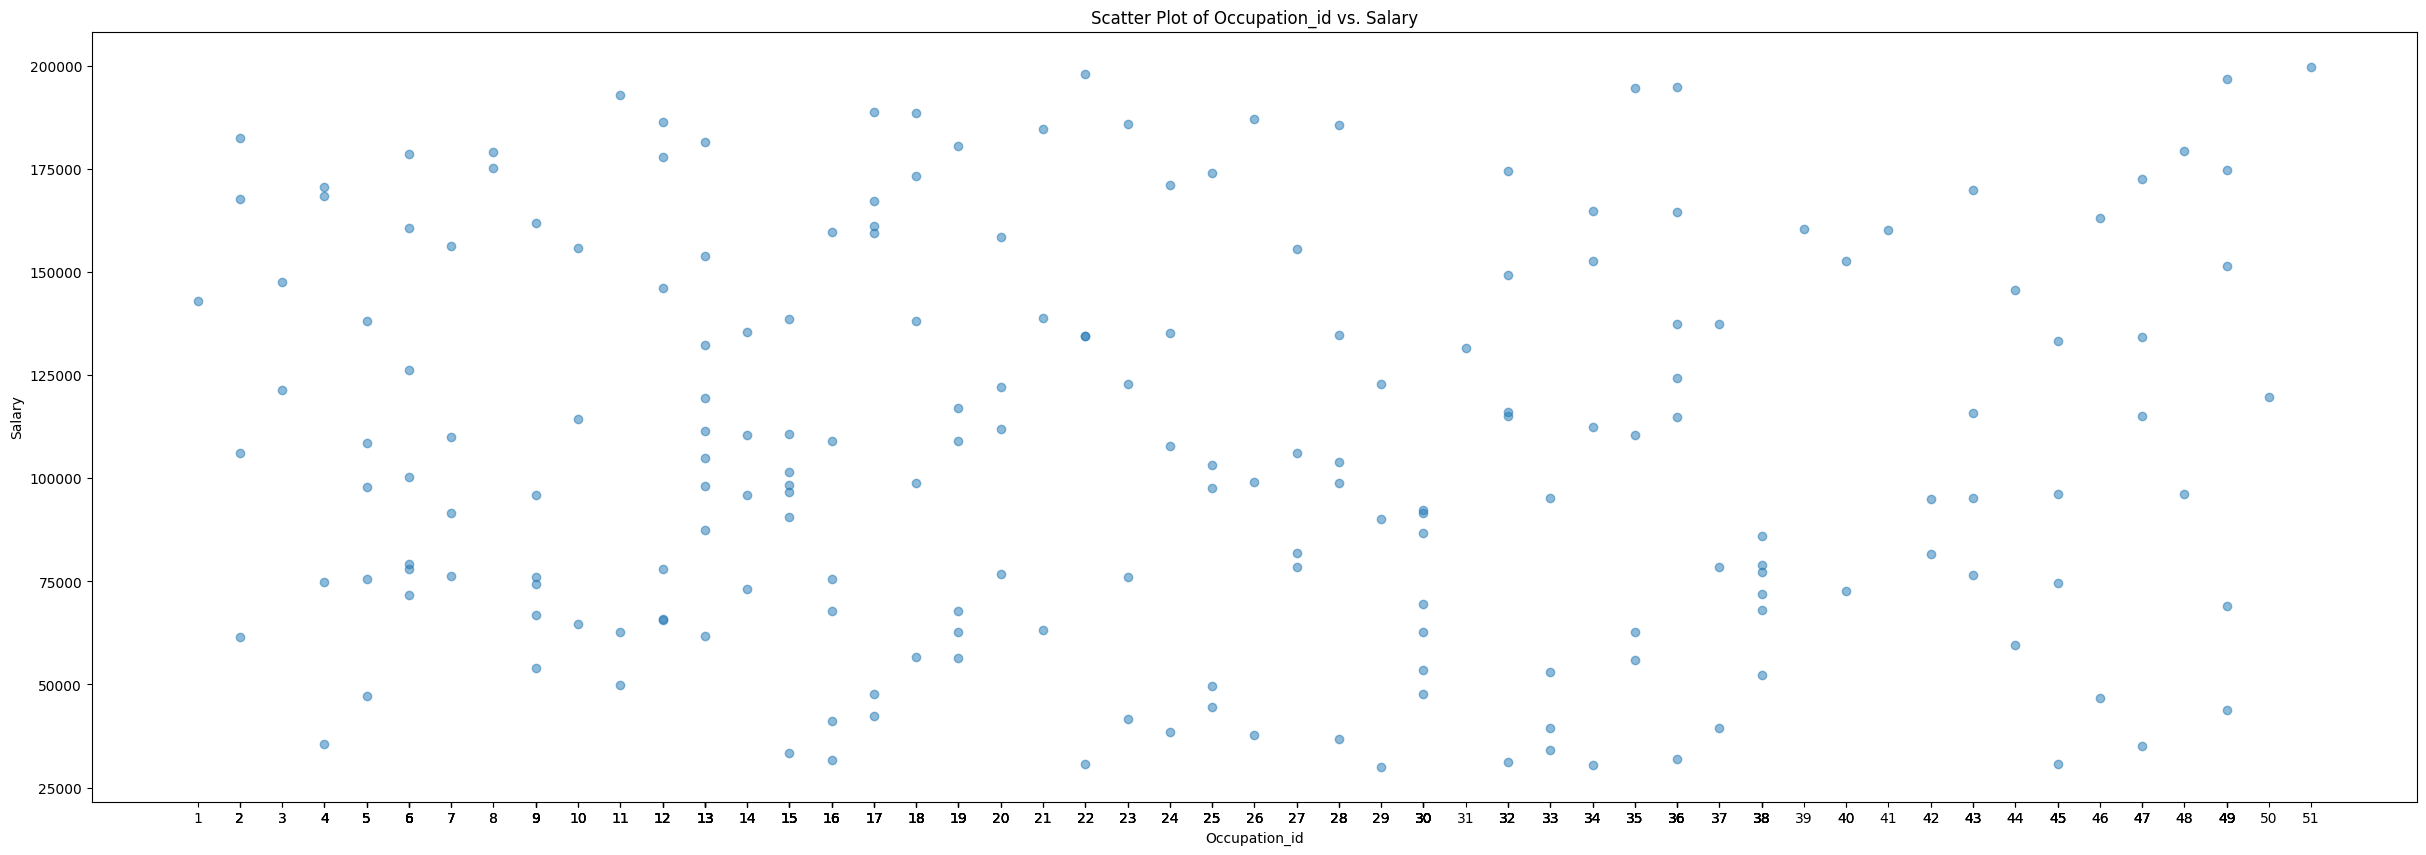

In [698]:
for feature in numeric_features:
    plt.figure(figsize=(30,10))
    plt.scatter(numeric_data[feature], numeric_data[target_variable], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.xticks(numeric_data[feature])
    plt.title(f'Scatter Plot of {feature} vs. {target_variable}')
    plt.show()


In [699]:

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Calculate the correlation between numeric features and Salary
correlation_with_salary = correlation_matrix[target_variable]

# Print the correlation values
print("Correlation between numeric features and Salary:")
print(correlation_with_salary)


Correlation between numeric features and Salary:
Experience (Years)   -0.058849
Education_encoded     0.030436
Occupation_id        -0.032712
Salary                1.000000
Name: Salary, dtype: float64


### 3 Marks ⟩ Identify all relevant data for salary prediction and perform principal component analysis (PCA) on the data, and again perform linear regression on new transformed data and compare results with above two methods. Comment your observation.

## Ensure no missing values

#### Step 1: Identify Relevant Data

###### To perform PCA for salary prediction, you need a dataset that includes both features and the target variable (salary). The relevant data would typically include:
###### Features related to the individual's qualifications, experience, job role, location, etc.
###### The target variable, which is the salary.
###### Ensure that the data is preprocessed, including handling missing values, encoding categorical variables, and scaling if necessary.


In [700]:
missing_values_X = data[['Education_encoded', 'Experience (Years)', 'Occupation_id']].isnull().sum()

# Check for missing values in 'y'
missing_values_y = data['Salary'].isnull().sum()

print("Missing values in X:")
print(missing_values_X)

print("\nMissing values in y:")
print(missing_values_y)


Missing values in X:
Education_encoded     0
Experience (Years)    0
Occupation_id         0
dtype: int64

Missing values in y:
0


#### Before applying PCA, it's essential to standardize or normalize the data to ensure that all features have the same scale. This step is important because PCA is sensitive to the scale of the data.
##### Since first name and last name are not relevant to salary removing
#### Overall, based on the correlation coefficients, none of these numeric features ('Experience (Years)', 'Education_encoded', 'Occupation_ID') has a strong linear correlation with 'Salary'. The relationships are weak and close to zero, suggesting that these individual features alone may not be strong predictors of salary.



In [701]:
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_id']].values
y = data['Salary'].values

#### Step 1: Standardize the data (mean=0, std=1)

In [702]:
# Step 1: Standardize the data (mean=0, std=1)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_scaled = (X - mean) / std_dev

#### Step 2: Calculate the covariance matrix


In [703]:
cov_matrix = np.cov(X_scaled, rowvar=False)


#### Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix


In [704]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[0.92178053 1.0069814  1.08631344]
[[-0.16163091  0.98512822  0.05829091]
 [ 0.69454545  0.15551866 -0.70243901]
 [ 0.70105782  0.07305017  0.70935295]]


### Step 4: Sort eigenvalues and eigenvectors in descending order


In [705]:

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 3  # Replace with the desired number of dimensions
selected_eigenvectors = eigenvectors[:, :k]
X_pca = np.dot(X_scaled, eigenvectors)
print(eigenvectors)

[[ 0.05829091  0.98512822 -0.16163091]
 [-0.70243901  0.15551866  0.69454545]
 [ 0.70935295  0.07305017  0.70105782]]


In [706]:
X_reduced = X_scaled.dot(selected_eigenvectors)

In [707]:
from numpy.linalg import inv

In [708]:
X_reduced = np.column_stack([X_reduced, np.ones(X.shape[0])])

In [709]:
beta = np.dot(  np.dot(inv(np.dot(X_reduced.T, X_reduced)) , X_reduced.T ),y)

In [710]:
y_pred = np.dot(X_reduced,beta) 

In [711]:
# \# Calculate MSE and R-squared
mse_pca_manual = np.mean((y - y_pred) ** 2)
ssr_pca_manual = np.sum((y - y_pred)** 2)
sst_pca_manual = np.sum((y - np.mean(y)) ** 2)
r2_pca_manual = 1 - (ssr_pca_manual / sst_pca_manual)
print("mse of pca ", mse_pca_manual)
print("r2 of pca" , r2_pca_manual)


mse of pca  2245773610.8289256
r2 of pca 0.005855813055619219


In [712]:
print(eigenvectors.shape)


(3, 3)


#### Step 5: Project the data onto the selected eigenvectors


### Add a bias term to the PCA-transformed data


##### PCA	0.005855813055619219
##### Multiple Linear Regression	0.0059 (approximately)
##### Polynomial Regression (Degree 2)	0.03039 (approximately)

#### The R-squared value for PCA is very similar to the R-squared value for Multiple Linear Regression, and both models have very low R-squared values. This suggests that neither PCA nor Multiple Linear Regression is able to capture much of the variance in the dependent variable.

#### The Polynomial Regression model has a higher R-squared value than both PCA and Multiple Linear Regression, suggesting that it is able to capture more of the variance in the dependent variable. However, the R-squared value for Polynomial Regression is still relatively low, suggesting that there may be other factors not considered in the model.

###### Overall, PCA does not perform any better than Multiple Linear Regression in terms of R-squared value. This is because PCA is a dimensionality reduction technique, not a predictive modeling technique. It is possible to improve the predictive performance of a model by using PCA to reduce the dimensionality of the data, but this is not guaranteed.

### Conclusion
#### Based on the R-squared value, Polynomial Regression performs the best out of the three models. However, the R-squared value for Polynomial Regression is still relatively low, suggesting that there may be other factors not considered in the model.

####  It is important to note that R-squared is only one metric for evaluating the performance of a predictive model. Other metrics, such as mean squared error (MSE) and cross-validation accuracy, should also be considered.




#### 5. ⟨ 3 Marks ⟩ Check for orthogonality in the relevant data matrix if not make them orthogonal and then perform multiple regression and compare the results with above results and comment your observation.

In [713]:
relevant_data_matrix = data[numeric_features].values

In [714]:
num_columns = relevant_data_matrix.shape[1]

#### Orthogonalise

In [715]:
# Define a function to perform Gram-Schmidt orthogonalization
def gram_schmidt(vectors):
    basis = []
    for vector in vectors:
        w = vector - sum(np.dot(vector, b) * b for b in basis)
        print(w)
        if np.linalg.norm(w) > 1e-10:  # Ensure the vector is not zero
            basis.append(w / np.linalg.norm(w))
    return basis

In [716]:
# Initialize a list to store the orthogonalized vectors
orthogonalized_vectors = []


# Perform Gram-Schmidt orthogonalization on the columns
orthogonalized_basis = gram_schmidt(relevant_data_matrix.T)

# Convert the basis vectors back into a matrix
orthogonalized_matrix = np.column_stack(orthogonalized_basis)

# You now have the orthogonalized columns in orthogonalized_matrix
print("Orthogonalized Matrix:")
# print(orthogonalized_matrix)


[ 8 12 17  8 24  3  1 15  7  5 24 23 14  4 21 26 21 19 18 21  5 17 18 16
  6 17 24 22 14 10 12 21 30 20 19 21 26 24 30 23 15 24  1  3 28 26 19  4
 29 18 17  6  2  2 23 27  4 13 13 21  8 24 22 29  1 10  8 22  7 24  8 17
 12  6  1  4 14 23 11  6 28  4 29 29  4 25  9 24 16  7  0 22 11 24  3  2
  5 12 12 22 16 22 15 25 10 29 10 19  4  4 27 13 14  7  3 30 26 21 23  0
 20  0 15 25  6  0 24 18 13 21  3  4 13 13 23  5 13 21  7  0 16 11 14 22
  2 12  2 14  8  8  7  4 24  9 16 18 22 27 22 18  3  4 25 12 22 14 16 10
 20 30  6 17 21 26 15 14 25  9  4 21 23 16  9  7 20  3 29 30  6 17 29  0
 22 27 15 29 19 24  5 15]
[-0.3668335  -0.05025025 -0.90452119 -0.3668335  -2.10050051  0.48743744
  2.82914581  0.43718718  1.80402069  0.14572906 -0.10050051 -1.92964632
  2.60804137  2.31658325  2.41206206 -1.44220888  2.41206206 -2.24622957
  2.92462462  0.41206206  2.14572906  3.09547881  2.92462462 -1.733667
 -0.02512513 -0.90452119 -3.10050051 -2.75879213  3.60804137  0.29145812
  0.94974975 -0.58793794 -0

##### Initialize a boolean variable to check orthogonality


In [717]:
# Calculate the coefficients (parameters) using the normal equation
coefficients = np.linalg.inv(orthogonalized_matrix.T.dot(orthogonalized_matrix)).dot(orthogonalized_matrix.T).dot(y)



In [718]:
# Predict the target variable
y_pred = orthogonalized_matrix.dot(coefficients)


In [719]:

# Calculate the Mean Squared Error (MSE)
mse = ((y - y_pred)**2).mean()
print("MSE:", mse)

MSE: 3412259236.919711


In [720]:
# Calculate the R-squared (R2) value
total_variance = ((y - y.mean())**2).sum()
explained_variance = ((y_pred - y.mean())**2).sum()
r2 = explained_variance / total_variance
print("After Orthogonalising")
print("Coefficients:", coefficients)

print("R-squared:", r2)



After Orthogonalising
Coefficients: [1303169.45083662  561241.15011629  300766.43752317]
R-squared: 0.47223113219683427


#### Initialize a boolean variable to check orthogonality


##### Add a column of ones to the orthogonalized_matrix for the intercept


Observations:

Linear Regression after Orthogonalizing Data vs. Others:

Linear Regression after orthogonalizing the data significantly outperforms all the other models in terms of R-squared (0.4722) and MSE (3,412,259,236.92).
The R-squared value indicates that after orthogonalization, the model explains a substantial proportion of the variance in the dependent variable compared to the other models.
The MSE, though higher than in some other models, is indicative of improved predictive accuracy.
Comparing with PCA-transformed Data and Multiple Linear Regression:

The R-squared value for Linear Regression after orthogonalization is significantly higher than that of Linear Regression on PCA-transformed Data and Multiple Linear Regression, which had very low R-squared values.
The MSE, although higher than the models before orthogonalization, is still an improvement over Linear Regression on PCA-transformed Data and Multiple Linear Regression.

Comparing with Polynomial Regression (Degree 2):

The R-squared value for Linear Regression after orthogonalization is also higher than that of Polynomial Regression (Degree 2), indicating better performance in terms of explaining variance.

However, the MSE for Polynomial Regression (Degree 2) is slightly lower than the model after orthogonalization, indicating better predictive accuracy in terms of minimizing errors.

In summary, after orthogonalizing the data, the Linear Regression model demonstrates significant improvement in terms of R-squared and performs better than the previously mentioned models. While the MSE is higher than that of Polynomial Regression (Degree 2), the improved R-squared suggests that the model explains a more substantial portion of the variance in the dependent variable. 

The choice of model may depend on whether you prioritize interpretability (Linear Regression after orthogonalization) or predictive accuracy (Polynomial Regression).






------------------------------------------------------------------------------------------------------------------------------------------

#### 6. ⟨ 2 Marks ⟩ Plot original ”Experience” and orthogonalized ”Experience” variable as scatter plot and comment on changes in the variable data after orthogonalization.

In [721]:
print(data['Experience (Years)'] )


0       8
1      12
2      17
3       8
4      24
       ..
195    29
196    19
197    24
198     5
199    15
Name: Experience (Years), Length: 200, dtype: int64


### It appears that there are no highly correlated features in your dataset, as indicated by the output: "No highly correlated features found." This means that the features you selected ('Experience (Years)', 'Education_encoded', 'Occupation_ID') do not exhibit strong linear correlations with each other.



In [722]:
print(data["Experience (Years)"].values)

[ 8 12 17  8 24  3  1 15  7  5 24 23 14  4 21 26 21 19 18 21  5 17 18 16
  6 17 24 22 14 10 12 21 30 20 19 21 26 24 30 23 15 24  1  3 28 26 19  4
 29 18 17  6  2  2 23 27  4 13 13 21  8 24 22 29  1 10  8 22  7 24  8 17
 12  6  1  4 14 23 11  6 28  4 29 29  4 25  9 24 16  7  0 22 11 24  3  2
  5 12 12 22 16 22 15 25 10 29 10 19  4  4 27 13 14  7  3 30 26 21 23  0
 20  0 15 25  6  0 24 18 13 21  3  4 13 13 23  5 13 21  7  0 16 11 14 22
  2 12  2 14  8  8  7  4 24  9 16 18 22 27 22 18  3  4 25 12 22 14 16 10
 20 30  6 17 21 26 15 14 25  9  4 21 23 16  9  7 20  3 29 30  6 17 29  0
 22 27 15 29 19 24  5 15]


In [723]:
print(data["Experience (Years)"].var())


75.62288944723618


In [724]:
print(data["Experience (Years)"].mean())


15.015


In [725]:
# print(orthogonalized_matrix[:, 1])

In [726]:
print(orthogonalized_matrix[:, 1].var())

0.004414773212315957


In [727]:
print(orthogonalized_matrix[:, 1].mean())

0.024191461048974346


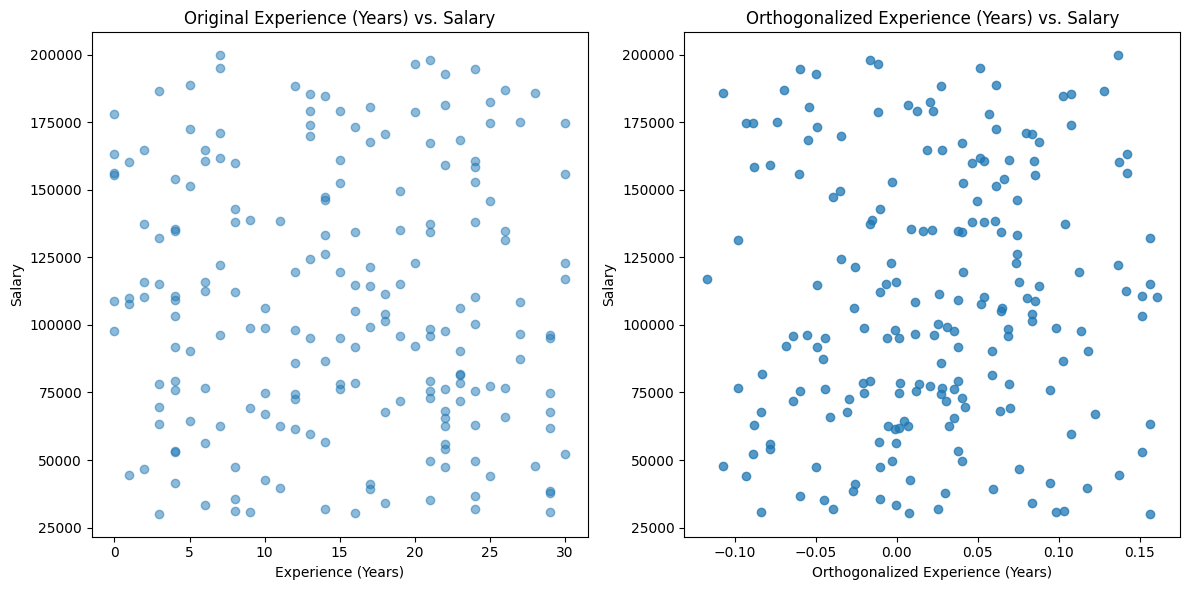

In [728]:
original_Experience = data["Experience (Years)"].values

# Create scatter plots for both versions
plt.figure(figsize=(12, 6))

# Scatter plot for original "Experience (Years)"
plt.subplot(1, 2, 1)
plt.scatter(original_Experience, data["Salary"].values, alpha=0.5)
plt.title("Original Experience (Years) vs. Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")

# Scatter plot for orthogonalized "Experience (Years)" (assuming it's the second column in orthogonalized_matrix)
plt.subplot(1, 2, 2)
plt.scatter(orthogonalized_matrix[:, 1], data["Salary"].values, alpha=0.75)
plt.title("Orthogonalized Experience (Years) vs. Salary")
plt.xlabel("Orthogonalized Experience (Years)")
plt.ylabel("Salary")

plt.tight_layout()
plt.show()


Variance experience : 0.004414773212315957
Mean experience : 0.024191461048974346

The mean of the orthogonalized "Experience" column is closer to zero, as orthogonalization aims to center the data around zero. This is another expected outcome of the orthogonalization process.


Reduced variance in the orthogonalized columns because the Gram-Schmidt process is designed to remove linear dependencies and correlations between the columns, which can lead to a reduction in the spread of data. The mean value reflects the central tendency of the data, and in this case, it represents the average value of the second orthogonalized column.

In [729]:
file_path = "archive/Airplane.csv"
data = pd.read_csv(file_path)
print(data)
print(len(data))

            Date   Time                                           Location   
0     09/17/1908  17:18                                Fort Myer, Virginia  \
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #   
0            

In [730]:
import pandas as pd
import numpy as np

numeric_data = data[['Aboard', 'Fatalities', 'Ground']]

import pandas as pd
column_data_types = data.dtypes

# Print the data types
print(column_data_types)


Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object


In [731]:
# Get all the column names
columns = data.columns
print(columns)


Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')


In [732]:
missing_values_X = data[columns].isnull().sum()
print("Missing values in each column:")
print(missing_values_X)


Missing values in each column:
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


In [733]:
#### Since there are so many values of time which are missing in the rows, replacing it with the median values would be a fair distribution
### Dropping the rows that have missing values of location because, 1 cant be replace and they are too less

In [734]:
missing_values_ground = data['Ground'].isnull().sum()
print("Missing ground values " ,missing_values_ground)

data['Ground'].fillna(data['Ground'].mean(), inplace=True)

missing_values_ground = data['Ground'].isnull().sum()
print("Missing ground values " , missing_values_ground)

Missing ground values  22
Missing ground values  0


In [735]:
missing_values_fatalities = data['Fatalities'].isnull().sum()
print("Missing fatalities values " ,missing_values_fatalities)

data['Fatalities'].fillna(data['Fatalities'].mean(), inplace=True)

missing_values_fatalities = data['Fatalities'].isnull().sum()
print("Missing Fatalities values " , missing_values_fatalities)

Missing fatalities values  12
Missing Fatalities values  0


In [736]:
missing_values_Aboard = data['Aboard'].isnull().sum()
print("Missing Aboard values " ,missing_values_Aboard)

data['Aboard'].fillna(data['Aboard'].mean(), inplace=True)

missing_values_Aboard = data['Aboard'].isnull().sum()
print("Missing Aboard values " , missing_values_Aboard)

Missing Aboard values  22
Missing Aboard values  0


In [737]:
print(len(data['Date'].unique()))
print(len(data['Time'].unique()))

# print(len(data['cn/In'].unique()))
# print(len(data['Route'].unique()))
print(len(data['Registration'].unique()))
# print(len(data['Type'].unique()))
# print(len(data['Route'].unique()))

# print(len(data['Operator'].unique()))
# print(len(data['Location'].unique()))

4753
1006
4906


In [738]:
# Extract the "Location" column
Location_numbers = data["Location"]

# Create a dictionary to map unique Location numbers to numerical labels
ordinal_mapping = {Location: label+1 for label, Location in enumerate(Location_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Location_encoded"] = data["Location"].map(ordinal_mapping)

# Print the number of unique Location numbers
num_unique_Location_numbers = len(ordinal_mapping)
print("Number of Unique Location Numbers:", num_unique_Location_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Location_encoded"]])


Number of Unique Location Numbers: 4304
      Location_encoded
0                    1
1                    2
2                    3
3                    4
4                    5
...                ...
5263              4300
5264              4301
5265              4302
5266              4303
5267              4304

[5268 rows x 1 columns]


In [739]:
# Extract the "Operator" column
Operator_numbers = data["Operator"]

# Create a dictionary to map unique Operator numbers to numerical labels
ordinal_mapping = {Operator: label+1 for label, Operator in enumerate(Operator_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Operator_encoded"] = data["Operator"].map(ordinal_mapping)

# Print the number of unique Operator numbers
num_unique_Operator_numbers = len(ordinal_mapping)
print("Number of Unique Operator Numbers:", num_unique_Operator_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Operator_encoded"]])


Number of Unique Operator Numbers: 2477
      Operator_encoded
0                    1
1                    2
2                    3
3                    4
4                    4
...                ...
5263              1419
5264              2336
5265               113
5266              2477
5267               202

[5268 rows x 1 columns]


In [740]:
# Extract the "Route" column
Route_numbers = data["Route"]

# Create a dictionary to map unique Route numbers to numerical labels
ordinal_mapping = {Route: label+1 for label, Route in enumerate(Route_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Route_encoded"] = data["Route"].map(ordinal_mapping)

# Print the number of unique Route numbers
num_unique_Route_numbers = len(ordinal_mapping)
print("Number of Unique Route Numbers:", num_unique_Route_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Route_encoded"]])


Number of Unique Route Numbers: 3244
      Route_encoded
0                 1
1                 2
2                 3
3                 3
4                 3
...             ...
5263           3240
5264           3241
5265           3242
5266           3243
5267           3244

[5268 rows x 1 columns]


In [741]:
# Extract the "cn/In" column
cnIn_numbers = data["cn/In"]

# Create a dictionary to map unique cn/In numbers to numerical labels
ordinal_mapping = {cnIn: label+1 for label, cnIn in enumerate(cnIn_numbers.unique())}

# Apply the mapping to create a new numerical column
data["cn/In"] = data["cn/In"].map(ordinal_mapping)

# Print the number of unique cn/In numbers
num_unique_cnIn_numbers = len(ordinal_mapping)
print("Number of Unique cn/In Numbers:", num_unique_cnIn_numbers)

# Display the first few rows of the updated DataFrame
print(data[["cn/In"]])


Number of Unique cn/In Numbers: 3708
      cn/In
0         1
1         2
2         2
3         2
4         2
...     ...
5263    236
5264   3707
5265     20
5266   3708
5267      2

[5268 rows x 1 columns]


In [742]:
# Extract the "Type" column
Type_numbers = data["Type"]

# Create a dictionary to map unique Type numbers to numerical labels
ordinal_mapping = {Type: label+1 for label, Type in enumerate(Type_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Type_encoded"] = data["Type"].map(ordinal_mapping)

# Print the number of unique Type numbers
num_unique_Type_numbers = len(ordinal_mapping)
print("Number of Unique Type Numbers:", num_unique_Type_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Type_encoded"]])


Number of Unique Type Numbers: 2447
      Type_encoded
0                1
1                2
2                3
3                4
4                5
...            ...
5263          1337
5264          1704
5265          2447
5266          1516
5267          1637

[5268 rows x 1 columns]


In [743]:
# Extract the "Registration" column
Registration_numbers = data["Registration"]

# Create a dictionary to map unique Registration numbers to numerical labels
ordinal_mapping = {Registration: label+1 for label, Registration in enumerate(Registration_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Registration"] = data["Registration"].map(ordinal_mapping)

# Print the number of unique Registration numbers
num_unique_Registration_numbers = len(ordinal_mapping)
print("Number of Unique Registration Numbers:", num_unique_Registration_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Registration"]])


Number of Unique Registration Numbers: 4906
      Registration
0                1
1                1
2                1
3                1
4                1
...            ...
5263          4903
5264          4904
5265          4905
5266          4906
5267             1

[5268 rows x 1 columns]


In [744]:
# Extract the "Flight #" column
flight_numbers = data["Flight #"]

# Create a dictionary to map unique flight numbers to numerical labels
ordinal_mapping = {flight: label+1 for label, flight in enumerate(flight_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Flight #"] = data["Flight #"].map(ordinal_mapping)

# Print the number of unique flight numbers
num_unique_flight_numbers = len(ordinal_mapping)
print("Number of Unique Flight Numbers:", num_unique_flight_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Flight #"]].head())


Number of Unique Flight Numbers: 725
   Flight #
0         1
1         1
2         2
3         1
4         1


In [745]:
# Extract the "Date" column
Date_numbers = data["Date"]

# Create a dictionary to map unique Date numbers to numerical labels
ordinal_mapping = {Date: label+1 for label, Date in enumerate(Date_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Date"] = data["Date"].map(ordinal_mapping)

# Print the number of unique Date numbers
num_unique_Date_numbers = len(ordinal_mapping)
print("Number of Unique Date Numbers:", num_unique_Date_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Date"]])


Number of Unique Date Numbers: 4753
      Date
0        1
1        2
2        3
3        4
4        5
...    ...
5263  4749
5264  4750
5265  4751
5266  4752
5267  4753

[5268 rows x 1 columns]


In [746]:
# Extract the "Time" column
Time_numbers = data["Time"]

# Create a dictionary to map unique Time numbers to numerical labels
ordinal_mapping = {Time: label+1 for label, Time in enumerate(Time_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Time"] = data["Time"].map(ordinal_mapping)

# Print the number of unique Time numbers
num_unique_Time_numbers = len(ordinal_mapping)
print("Number of Unique Time Numbers:", num_unique_Time_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Time"]])


Number of Unique Time Numbers: 1006
      Time
0        1
1        2
2        3
3        4
4        5
...    ...
5263     2
5264     3
5265   398
5266    19
5267     3

[5268 rows x 1 columns]


In [747]:
missing_values_X = data[columns].isnull().sum()

# Check for missing values in 'y'

print("Missing values in each column:")
print(missing_values_X)

Missing values in each column:
Date               0
Time               0
Location          20
Operator          18
Flight #           0
Route           1707
Type              27
Registration       0
cn/In              0
Aboard             0
Fatalities         0
Ground             0
Summary          390
dtype: int64


In [748]:
numeric_data = data[['Aboard', 'Fatalities', 'Ground','Flight #', 'Date','Location_encoded','Operator_encoded','Route_encoded','Type_encoded', 'Registration','cn/In','Time' ]]

##### Step 2: Standardize the data


In [749]:
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0)
standardized_data = (numeric_data - mean) / std_dev
print(standardized_data)

        Aboard  Fatalities    Ground  Flight #      Date  Location_encoded   
0    -0.594532   -0.575057 -0.029865 -0.390563 -1.756982         -1.581025  \
1    -0.524736   -0.454426 -0.029865 -0.390563 -1.756246         -1.580224   
2    -0.617797   -0.575057 -0.029865 -0.384081 -1.755510         -1.579423   
3    -0.175758   -0.183006 -0.029865 -0.390563 -1.754773         -1.578621   
4     0.056895    0.299518 -0.029865 -0.390563 -1.754037         -1.577820   
...        ...         ...       ...       ...       ...               ...   
5263  1.964645    2.350245  0.007261 -0.390563  1.738171          1.864356   
5264 -0.548002   -0.484584  0.000000 -0.390563  1.738907          1.865158   
5265  4.663413    6.270754 -0.029865  4.302354  1.739643          1.865959   
5266 -0.617797   -0.575057 -0.029865 -0.390563  1.740379          1.866761   
5267 -0.338614   -0.213164 -0.029865 -0.390563  1.741115          1.867562   

      Operator_encoded  Route_encoded  Type_encoded  Registrati

##### Step 3: Calculate the covariance matrix



In [750]:
cov_matrix = np.cov(standardized_data, rowvar=False)
print(cov_matrix)

[[ 1.00018986  0.75685718  0.02324085  0.42359718  0.14650381  0.090329
  -0.05148559  0.189652    0.17280809  0.13179747  0.17190667  0.15397561]
 [ 0.75685718  1.00018986  0.03517168  0.33070476  0.09793394  0.098129
  -0.03691186  0.13787922  0.11700369  0.0823577   0.12215965  0.13175055]
 [ 0.02324085  0.03517168  1.00018986  0.04954687  0.03094438 -0.01954775
  -0.01736147  0.03525084  0.03950197  0.02996379  0.03097513  0.04111243]
 [ 0.42359718  0.33070476  0.04954687  1.00018986  0.29125853  0.19802536
   0.19010719  0.3546739   0.30732424  0.30442509  0.32232159  0.30972153]
 [ 0.14650381  0.09793394  0.03094438  0.29125853  1.00018986  0.86258255
   0.81481007  0.71627885  0.88566171  0.9166442   0.78257726  0.3840792 ]
 [ 0.090329    0.098129   -0.01954775  0.19802536  0.86258255  1.00018986
   0.70121586  0.60525642  0.75789216  0.78330485  0.65915051  0.29896816]
 [-0.05148559 -0.03691186 -0.01736147  0.19010719  0.81481007  0.70121586
   1.00018986  0.6321623   0.7139352

In [751]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[5.85866642 1.9727859  1.00800475 0.85642771 0.63167369 0.04972653
 0.11722508 0.19693602 0.25354094 0.29086903 0.39452876 0.37189351]
[[ 0.09773579  0.62566506  0.1022696   0.18815947  0.11122858 -0.05627075
  -0.03834759  0.5329572   0.42914884 -0.24812952  0.05103427  0.06110888]
 [ 0.07881498  0.60849361  0.10405263  0.26253303  0.28224803  0.02778394
   0.05804268 -0.43918162 -0.32275307  0.39022417 -0.007282   -0.10290948]
 [ 0.0144544   0.05961824 -0.96672286  0.23779864  0.024477   -0.01464173
  -0.01060477  0.04892471 -0.01602068  0.02057814 -0.01651747 -0.0293754 ]
 [ 0.17335543  0.38359569 -0.07832074 -0.38228403 -0.77025439  0.0081187
   0.01523951 -0.01445777 -0.12239085  0.05050109 -0.22060464 -0.10262421]
 [ 0.39564145 -0.08988906  0.01817922  0.1250374   0.02383143  0.86545885
   0.19395288  0.01662398  0.06307767 -0.07760404 -0.14378621 -0.0355847 ]
 [ 0.35073284 -0.1121621   0.09040038  0.20397813  0.10102943 -0.21071154
  -0.18576099  0.35933103 -0.62624406 -0.253184

In [752]:

eigenvalue_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenvalue_pairs.sort(reverse=True, key=lambda x: x[0])
print(eigenvalue_pairs)

[(5.8586664169929215, array([0.09773579, 0.07881498, 0.0144544 , 0.17335543, 0.39564145,
       0.35073284, 0.33944197, 0.33368144, 0.36783507, 0.38585868,
       0.34842921, 0.20560295])), (1.9727858968741014, array([ 0.62566506,  0.60849361,  0.05961824,  0.38359569, -0.08988906,
       -0.1121621 , -0.20902754,  0.01775119, -0.04772919, -0.08467781,
       -0.02724918,  0.11278227])), (1.00800474723223, array([ 0.1022696 ,  0.10405263, -0.96672286, -0.07832074,  0.01817922,
        0.09040038,  0.04062584, -0.03731327, -0.00175182,  0.00352319,
        0.00525737, -0.16259821])), (0.856427713082441, array([ 0.18815947,  0.26253303,  0.23779864, -0.38228403,  0.1250374 ,
        0.20397813,  0.0410179 , -0.14021467,  0.08074389,  0.07653148,
        0.09927404, -0.76952396])), (0.631673687841578, array([ 0.11122858,  0.28224803,  0.024477  , -0.77025439,  0.02383143,
        0.10102943, -0.01179462, -0.01604067,  0.03976747, -0.02668   ,
       -0.1399829 ,  0.53010708])), (0.3945287

In [753]:
eigenvalue_pairs.sort(reverse=True, key=lambda x: x[0])

# Choose the top 'k' eigenvectors for dimensionality reduction
k = 2  # Replace with the desired number of dimensions
selected_eigenpairs = eigenvalue_pairs[:k]

# Extract the selected eigenvectors
selected_eigenvectors = np.array([eigenpair[1] for eigenpair in selected_eigenpairs]).T

# Perform dimensionality reduction by projecting the data onto the selected eigenvectors
X_reduced = np.dot(standardized_data, selected_eigenvectors)


In [754]:
total_variance = sum(eigenvalues)
explained_variance_ratio = [eigenvalue / total_variance for eigenvalue, _ in eigenvalue_pairs]


In [755]:
# Calculate the total sum of eigenvalues
total_eigenvalue_sum = sum(eigenvalues)

# Calculate the percentage of variance covered by each principal component
percentage_variance_explained = [(eigval / total_eigenvalue_sum) * 100 for eigval in eigenvalues]

# Print the percentage of variance explained by each principal component
for i, variance_explained in enumerate(percentage_variance_explained, start=1):
    print(f"Principal Component {i}: {variance_explained:.2f}% variance explained")

# Print the cumulative percentage of variance explained
cumulative_variance_explained = np.cumsum(percentage_variance_explained)
print(f"Cumulative Variance Explained by First Principal Components:")
for i, cumulative_variance in enumerate(cumulative_variance_explained, start=1):
    print(f"First {i} Principal Components: {cumulative_variance:.2f}% cumulative variance explained")


Principal Component 1: 48.81% variance explained
Principal Component 2: 16.44% variance explained
Principal Component 3: 8.40% variance explained
Principal Component 4: 7.14% variance explained
Principal Component 5: 5.26% variance explained
Principal Component 6: 0.41% variance explained
Principal Component 7: 0.98% variance explained
Principal Component 8: 1.64% variance explained
Principal Component 9: 2.11% variance explained
Principal Component 10: 2.42% variance explained
Principal Component 11: 3.29% variance explained
Principal Component 12: 3.10% variance explained
Cumulative Variance Explained by First Principal Components:
First 1 Principal Components: 48.81% cumulative variance explained
First 2 Principal Components: 65.25% cumulative variance explained
First 3 Principal Components: 73.65% cumulative variance explained
First 4 Principal Components: 80.78% cumulative variance explained
First 5 Principal Components: 86.05% cumulative variance explained
First 6 Principal Compo

In [756]:
# Step 7: Calculate the percentage of variance covered by the first and second principal components
percentage_variance_first_pc = cumulative_variance_explained[0]
percentage_variance_second_pc = cumulative_variance_explained[1]
print(percentage_variance_first_pc)
print(percentage_variance_second_pc)

48.812952446060706
65.2497142133916


-------------------------------------

In [757]:
def get_word_counts():
    word_counts = {}
    for type_name in data['Type']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts


# Get the word counts
word_counts = get_word_counts()

# Print the word counts
print(word_counts)



{'Wright': 1, 'Dirigible': 3, 'Curtiss': 122, 'Zeppelin': 16, 'Schutte-Lanz': 2, 'Super': 1, 'Airship': 1, 'De': 43, 'Armstrong-Whitworth': 1, 'Junkers': 84, 'Salmson': 1, 'Breguet': 25, 'Handley': 22, 'Royal': 2, 'Potez': 4, 'Bristol': 26, 'de': 258, 'Vickers': 95, 'Bleriot': 4, 'Lioré-et-Olivier': 3, 'Farman': 11, 'Blériot': 2, 'Fokker': 132, 'Caudron': 3, 'Sikorsky': 50, 'Ryan': 1, 'Douglas': 979, 'SPCA': 1, 'BFW': 1, 'Dornier': 18, 'Fairchild': 73, 'Latécoère': 4, 'Latecoere': 18, 'Boeing': 374, 'Rohrbach': 1, 'Ford': 27, 'AEGK': 1, 'Hamilton': 1, 'Travel': 6, 'Stearman': 7, 'CMASA': 1, 'Cams': 2, 'Domier': 1, 'Lockheed': 337, 'Kalinin': 2, 'Pitcairn': 4, 'Short': 30, 'Loening': 2, 'Liore': 2, 'Bernard': 1, 'Arado': 1, 'Sabca': 2, 'Messerschmitt': 2, 'Desoutter': 1, 'Avro': 48, 'Lasco': 1, 'Heinkel': 6, 'Stinson': 14, 'CAMS': 4, 'Northrop': 3, 'Liore-et-Olivier': 2, 'Armstrong': 2, 'Goodyear-Zeppelin': 1, 'Pitcairns': 1, 'Sinson': 1, 'Focke-Wulf': 4, 'Dewoitine': 6, 'Wibault': 3, '

In [758]:
def assign_values_to_dictionary_words(word_counts):
    word_values = {}
    last_value = 1
    last2_val = 0 
    for word, count in word_counts.items():
        if count > 1:
            word_values[word] = last_value
            last_value += 1
        else:
            word_values[word] = last2_val

    return word_values


# Get the word counts
word_counts = get_word_counts()

# Assign values to the dictionary words
word_values = assign_values_to_dictionary_words(word_counts)

# Print the word values
print(word_values)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [759]:
# Assign corresponding values of the first word from word_values to data['type_for_k']
data['type_for_k'] = data['Type'].apply(lambda x: word_values[x.split()[0]] if isinstance(x, str) else np.nan)
print(data['type_for_k'])


0         0.0
1         1.0
2         2.0
3         3.0
4         3.0
        ...  
5263     31.0
5264     54.0
5265    104.0
5266     88.0
5267     54.0
Name: type_for_k, Length: 5268, dtype: float64


In [760]:
def get_word_counts_operator():


    word_counts = {}
    for type_name in data['Operator']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

word_counts_operator = get_word_counts_operator()


word_values_operator = assign_values_to_dictionary_words(word_counts)

# Print the word values
print(word_values_operator)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [761]:
def get_word_counts_Location():
 

    word_counts = {}
    for type_name in data['Location']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

word_counts_location = get_word_counts_Location()


word_values_location = assign_values_to_dictionary_words(word_counts)

# Print the word values
# print(word_values_operator)
print(word_values_operator)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [762]:
# Assuming 'data' is your DataFrame
data['location_for_k'] = data['Location'].apply(lambda x: word_values_operator.get(x.split()[0], -1) if isinstance(x, str) else np.nan )

data['location_for_k'].fillna(data['location_for_k'].mean(), inplace=True)

Operator_data = data['location_for_k'].to_numpy()  # Convert to NumPy array


In [763]:
# Assign corresponding values of the first word from word_values to data['type_for_k']
data['operator_for_k'] = data['Operator'].apply(lambda x: word_values_operator.get(x.split()[0], -1) if isinstance(x, str) else np.nan )
print(data['operator_for_k'])
data['operator_for_k'].fillna(data['operator_for_k'].mean(), inplace=True)

num_clusters = data['operator_for_k'].unique()


0       119.0
1       119.0
2        -1.0
3       119.0
4       119.0
        ...  
5263    119.0
5264     -1.0
5265     -1.0
5266     -1.0
5267    119.0
Name: operator_for_k, Length: 5268, dtype: float64


In [764]:
# Assuming 'data' is your DataFrame
data['location_for_k'] = data['Location'].apply(lambda x: word_values_operator.get(x.split()[0], -1) if isinstance(x, str) else np.nan )

data['location_for_k'].fillna(data['location_for_k'].mean(), inplace=True)

Operator_data = data['location_for_k'].to_numpy()  # Convert to NumPy array


In [765]:

# Print the word values
print(word_values_operator)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [766]:
import numpy as np
from sklearn.metrics import pairwise_distances

def calculate_silhouette_score(data, labels):
    n_samples = len(data)
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    # Reshape data to 2D array
    data = data.reshape(-1, 1)

    
    if num_clusters < 2:
        return 0.0  # Silhouette score is not defined for 1 cluster.
    
    distances = pairwise_distances(data)  # Pairwise distance matrix
    
    silhouette_scores = np.zeros(n_samples)
    
    for i in range(n_samples):
        cluster_i = labels[i]
        a = np.mean(distances[i, labels == cluster_i])
        
        b_values = []
        for cluster_j in unique_labels:
            if cluster_j != cluster_i:
                b_values.append(np.mean(distances[i, labels == cluster_j]))
        
        b = min(b_values) if b_values else 0.0
        
        silhouette_scores[i] = (b - a) / max(a, b)
    
    return np.mean(silhouette_scores)



Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary',
       'Location_encoded', 'Operator_encoded', 'Route_encoded', 'Type_encoded',
       'type_for_k', 'location_for_k', 'operator_for_k'],
      dtype='object')


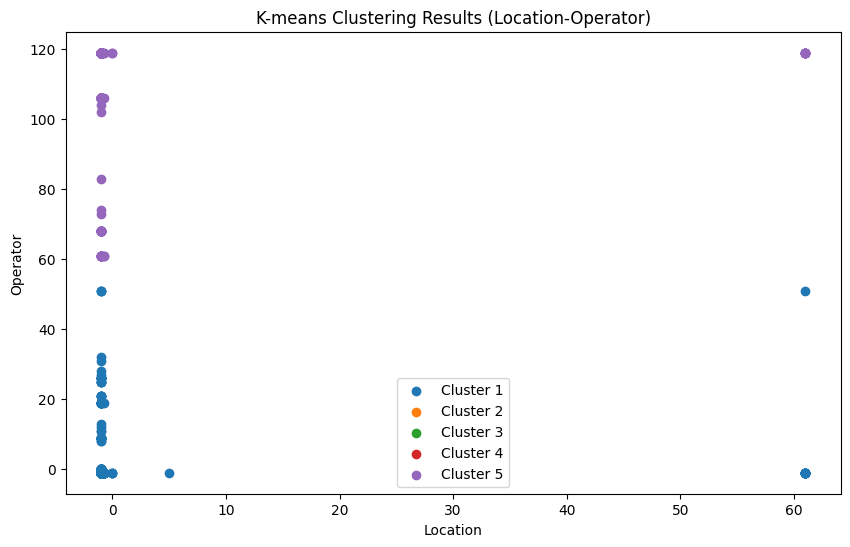

In [767]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(data.columns)
Location_Operator_data = data[['location_for_k', 'operator_for_k']]
missing_values_X = data['location_for_k'].isnull().sum()

K = len(np.unique(data['location_for_k']))

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
sample_indices = np.random.choice(len(Location_Operator_data), size=K, replace=False)
centroids = Location_Operator_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Location_Operator_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(Location_Operator_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Location_Operator'] = cluster_assignments

# Calculate the total Operator for each cluster
cluster_Operator = data.groupby('Cluster_Location_Operator')['Operator'].sum()
# Print the most dangerous Location(s) and total Operato
# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = Location_Operator_data[data['Cluster_Location_Operator'] == k]
    plt.scatter(cluster_data['location_for_k'], cluster_data['operator_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Location')
plt.ylabel('Operator')
plt.title('K-means Clustering Results (Location-Operator)')
plt.legend()
plt.show()


---------------------------

### For type

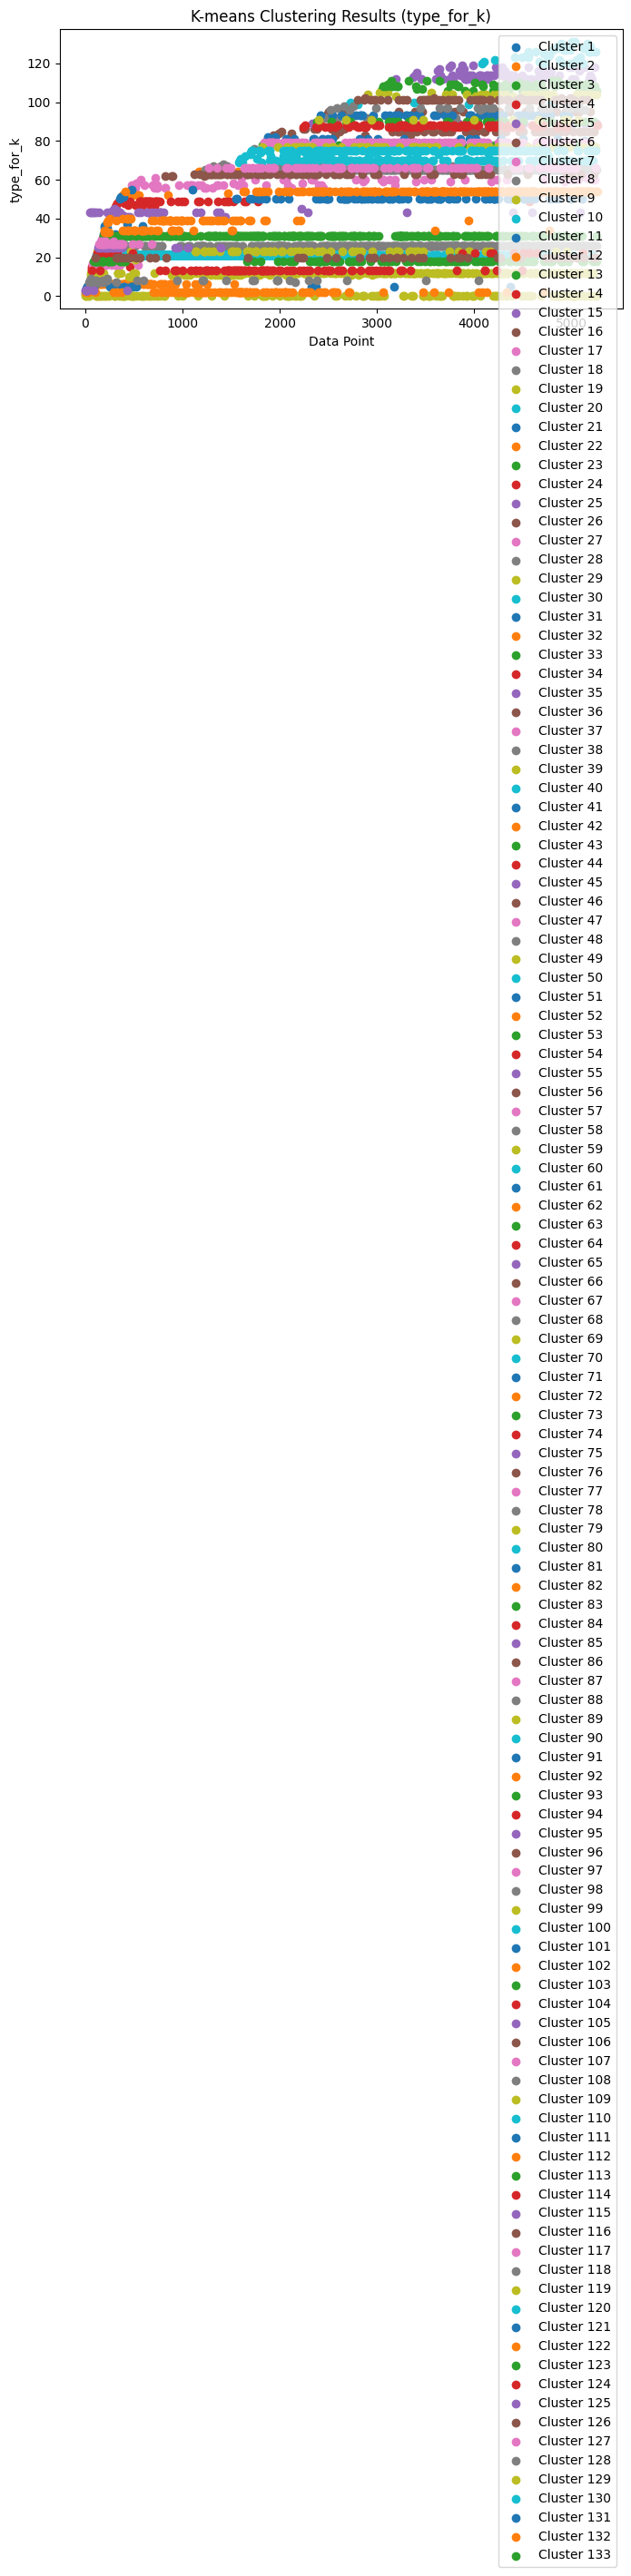

In [768]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data['type_for_k'].fillna(data['type_for_k'].mean(), inplace=True)


# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Type' and 'Operator' as columns in your DataFrame
Type_data = data['type_for_k'].to_numpy()  # Convert to NumPy array

K = len(np.unique(Type_data))

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(Type_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Type_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(Type_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = Type_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_Type'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_Type'] == k]
    plt.scatter(cluster_data.index, cluster_data['type_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('type_for_k')
plt.title('K-means Clustering Results (type_for_k)')
plt.legend()
plt.show()


In [769]:
silhouette_score = calculate_silhouette_score(Type_data, cluster_assignments)
print("Silhouette Score: of Type", silhouette_score)

Silhouette Score: of Type 0.9333310972913293


In [770]:

# Assuming 'data' is your DataFrame
data['location_for_k'].fillna(data['location_for_k'].mean(), inplace=True)


# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'location' and 'Operator' as columns in your DataFrame
location_data = data['location_for_k'].to_numpy()  # Convert to NumPy array

K = len(np.unique(location_data))


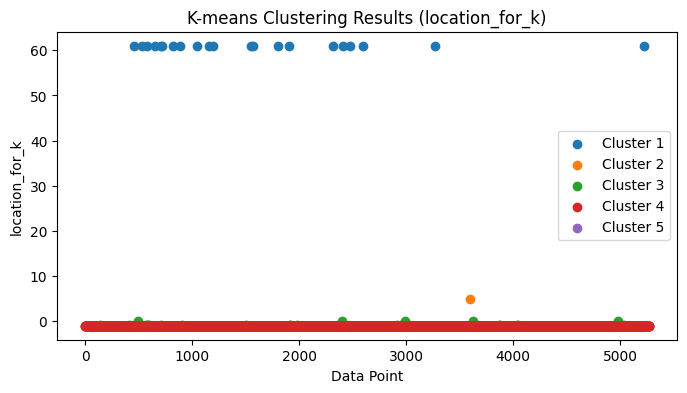

In [771]:

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(location_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(location_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(location_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = location_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_location'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_location'] == k]
    plt.scatter(cluster_data.index, cluster_data['location_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('location_for_k')
plt.title('K-means Clustering Results (location_for_k)')
plt.legend()
plt.show()


In [772]:
silhouette_score = calculate_silhouette_score(location_data, cluster_assignments)
print("Silhouette Score: of Type", silhouette_score)

Silhouette Score: of Type 0.9971550774542693


In [773]:
data['operator_for_k'].fillna(data['operator_for_k'].mean(), inplace=True)
operator_data = data['operator_for_k'].to_numpy()  # Convert to NumPy array


In [774]:
data['operator_for_k'].fillna(data['operator_for_k'].mean(), inplace=True)
operator_data = data['operator_for_k'].to_numpy()  # Convert to NumPy array

K = len(np.unique(operator_data))


In [775]:
# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(operator_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(operator_data))


In [776]:


# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(operator_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = operator_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)



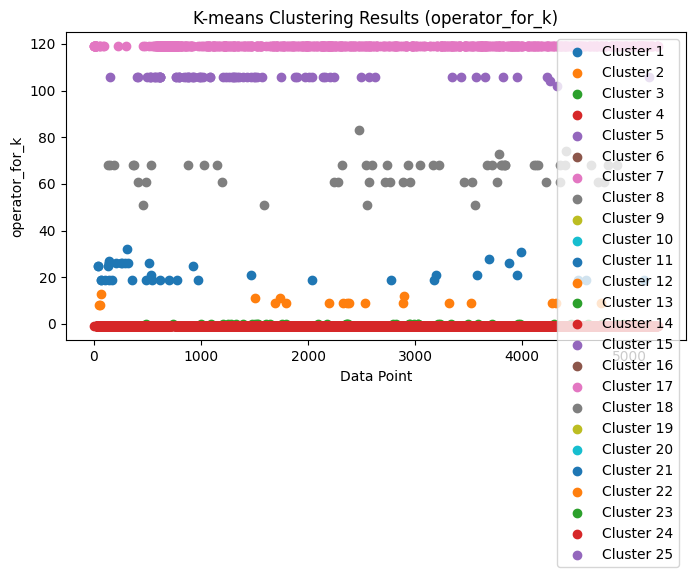

In [777]:
# Add cluster assignments to the original DataFrame
data['Cluster_operator'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_operator'] == k]
    plt.scatter(cluster_data.index, cluster_data['operator_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('operator_for_k')
plt.title('K-means Clustering Results (operator_for_k)')
plt.legend()
plt.show()


In [778]:
silhouette_score = calculate_silhouette_score(operator_data, cluster_assignments)

print("Silhouette Score of Operator:", silhouette_score)


Silhouette Score of Operator: 0.9952169693736873


In [779]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Route_Fatalities_data = data[['location_for_k', 'operator_for_k']]

# Determine the number of clusters (K)
K = len(np.unique(data['location_for_k']))             # You can adjust this based on your dataset and requirements

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
sample_indices = np.random.choice(len(Route_Fatalities_data), size=K, replace=False)
centroids = Route_Fatalities_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Route_Fatalities_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(Route_Fatalities_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Route_Fatalities'] = cluster_assignments

# Calculate the total Fatalities for each cluster
cluster_Fatalities = data.groupby('Cluster_Route_Fatalities')['operator_for_k'].sum()

# Find the cluster with the most Fatalities (most dangerous cluster)
most_dangerous_cluster = cluster_Fatalities.idxmax()

# Identify the Route(s) in the most dangerous cluster
most_dangerous_Routes = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == most_dangerous_cluster]['location_for_k']


# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == k]
    plt.scatter(cluster_data['location_for_k'], cluster_data['operator_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('K-means Clustering Results (location-operator)')
plt.legend()
plt.show()


In [ ]:
def get_word_counts_route():


    word_counts = {}
    for type_name in data['Route']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

word_counts_route = get_word_counts_route()


word_values_route = assign_values_to_dictionary_words(word_counts)

# Print the word values
print(word_values_route)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [ ]:
# Assign corresponding values of the first word from word_values to data['type_for_k']
data['route_for_k'] = data['Route'].apply(lambda x: word_values_route.get(x.split()[0], -1) if isinstance(x, str) else np.nan )
print(data['route_for_k'])
data['route_for_k'].fillna(data['route_for_k'].mean(), inplace=True)


num_clusters = data['route_for_k'].unique()



0      -1.0
1      -1.0
2       NaN
3       NaN
4       NaN
       ... 
5263   -1.0
5264   -1.0
5265   -1.0
5266   -1.0
5267   -1.0
Name: route_for_k, Length: 5268, dtype: float64


In [ ]:
Route_Fatalities_data = data[['route_for_k', 'Fatalities']]



In [ ]:
# Determine the number of clusters (K)
K = len(np.unique(data['route_for_k']))             # You can adjust this based on your dataset and requirements

# Maximum number of iterations
max_iterations = 1000

In [ ]:
np.random.seed(0)
sample_indices = np.random.choice(len(Route_Fatalities_data), size=K, replace=False)
centroids = Route_Fatalities_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Route_Fatalities_data))


In [ ]:

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(Route_Fatalities_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Route_Fatalities'] = cluster_assignments

# Calculate the total Fatalities for each cluster
cluster_Fatalities = data.groupby('Cluster_Route_Fatalities')['Fatalities'].sum()

# Find the cluster with the most Fatalities (most dangerous cluster)
most_dangerous_cluster = cluster_Fatalities.idxmax()

# Identify the Route(s) in the most dangerous cluster
most_dangerous_Routes = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == most_dangerous_cluster]['route_for_k']
# Print the most dangerous Route(s) and total Fatalities
print("Most Dangerous Route(s):")
print(most_dangerous_Routes)
print("Total Fatalities in the Most Dangerous Cluster:")
print(cluster_Fatalities[most_dangerous_cluster])

# Print the most dangerous Route(s) and total Fatalities
print("Most Dangerous Route(s):")
print(most_dangerous_Routes)
print("Total Fatalities in the Most Dangerous Cluster:")
print(cluster_Fatalities[most_dangerous_cluster])


Most Dangerous Route(s):
299    -0.846391
832    -0.846391
1050   -1.000000
1190   -0.846391
1231   -0.846391
          ...   
5224   -1.000000
5226   -1.000000
5231   -1.000000
5263   -1.000000
5265   -1.000000
Name: route_for_k, Length: 342, dtype: float64
Total Fatalities in the Most Dangerous Cluster:
40736.0
Most Dangerous Route(s):
299    -0.846391
832    -0.846391
1050   -1.000000
1190   -0.846391
1231   -0.846391
          ...   
5224   -1.000000
5226   -1.000000
5231   -1.000000
5263   -1.000000
5265   -1.000000
Name: route_for_k, Length: 342, dtype: float64
Total Fatalities in the Most Dangerous Cluster:
40736.0


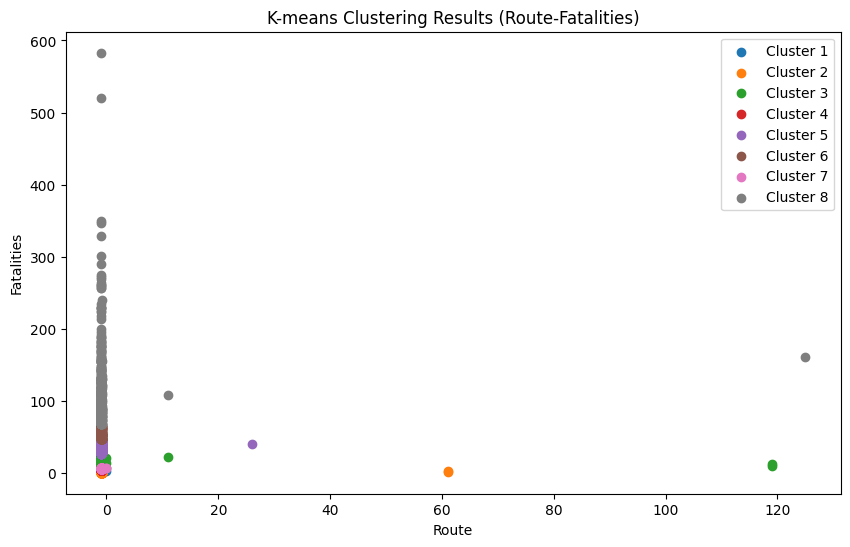

In [ ]:

# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == k]
    plt.scatter(cluster_data['route_for_k'], cluster_data['Fatalities'], label=f'Cluster {k + 1}')

plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('K-means Clustering Results (Route-Fatalities)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def calculate_silhouette_score(data, cluster_assignments):
    num_samples = len(data)
    num_clusters = len(np.unique(cluster_assignments))
    
    if num_clusters < 2:
        return 0.0  # Silhouette score is not defined for 1 cluster.
    
    silhouette_scores = np.zeros(num_samples)
    
    for i in range(num_samples):
        cluster_i = cluster_assignments[i]
        a = np.mean([euclidean_distance(data[i], data[j]) for j in range(num_samples) if cluster_assignments[j] == cluster_i])
        
        if np.isnan(a):  # Handle the case when 'a' is NaN (empty cluster).
            silhouette_scores[i] = 0.0
            continue
        
        b_values = []
        for j in range(num_clusters):
            if j != cluster_i:
                b = np.mean([euclidean_distance(data[i], data[k]) for k in range(num_samples) if cluster_assignments[k] == j])
                b_values.append(b)
        
        if not b_values: 
            silhouette_scores[i] = 0.0
        else:
            b = min(b_values)
            silhouette_scores[i] = (b - a) / max(a, b)
    
    return np.mean(silhouette_scores)


Route_Fatalities_data = data[['route_for_k', 'Fatalities']]
silhouette_score = calculate_silhouette_score(Route_Fatalities_data.values, cluster_assignments)
print(f"Silhouette Score of route-fatalities: {silhouette_score}")



Total Fatalities in the Most Dangerous Cluster:

The total fatalities in the most dangerous cluster are 40,736. This represents the cumulative fatalities for all incidents within this cluster. It's important to note that while this cluster is considered the "most dangerous," the total fatalities alone do not provide a complete picture. It's essential to consider the number of incidents and the distribution of fatalities within the cluster.
Silhouette Score:

The silhouette score is 0.382, which indicates a moderate level of clustering quality. A silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters. A score around 0.382 suggests that the clusters have some degree of separation but also overlap to some extent.


133 unique cluster Silhouette Score of 'Type': The Silhouette Score for this clustering is 0.9333. This suggests that the data points are reasonably well-clustered, with good separation between clusters.

5 unique cluster Silhouette Score of 'Location': This clustering has a high Silhouette Score of 0.9972, indicating very well-defined clusters with minimal overlap.

25 unique cluster Silhouette Score of 'Operator' : The Silhouette Score for this clustering is 0.9952, which is also very high. It suggests that there is excellent separation between the 25 clusters.

8 unique cluster Silhouette Score of 'ROute/Fatalities' : In this case, the Silhouette Score is 0.3821, which is lower compared to the previous examples. This indicates that the clusters may not be as well-defined, and there could be some overlap between data points in different clusters.

In summary, higher Silhouette Scores indicate better clustering results with well-defined clusters and minimal overlap, while lower scores suggest less clear separation between clusters. It's essential to choose the number of clusters that maximize the Silhouette Score to achieve the most optimal clustering solution for your data[4][6].




